In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3816/32105/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1639889396&Signature=LIkhjYnlPWhj8IIsGiiwW%2F3rYJmpJ72oU2%2BcjYMuvrzUWp1Tydrp9e7jLEQy8%2B82Mz7pIwrf%2BBivITgDEFvBgMpGkkePFVuC9UbECVtUeHDWhmTpjZiPNyCd9uY7AfHNxGw65r%2FRSfP7EpY%2FpSEsRATc7fPvB7LPy%2FvSjWCWFe4lMOqBfpTJ0uVwKEE%2BbbPCAWH7w6AxCgWvIrbwG8hY6k%2FXpINVzzilDUHn8558MdOGDOSVJNa4vQ9NCaQ2AkE5fb91Deao0ldGg35HbXL2iXG83X4q5W1FDOI3pH56jvICBO3MIGvKbQXg5kRBCmBQWYh2fVGPuDiBv%2B6FH5DArQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dwalmart-recruiting-store-sales-forecasting.zip" -c -O 'walmart-recruiting-store-sales-forecasting.zip'

--2021-12-16 04:50:34--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3816/32105/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1639889396&Signature=LIkhjYnlPWhj8IIsGiiwW%2F3rYJmpJ72oU2%2BcjYMuvrzUWp1Tydrp9e7jLEQy8%2B82Mz7pIwrf%2BBivITgDEFvBgMpGkkePFVuC9UbECVtUeHDWhmTpjZiPNyCd9uY7AfHNxGw65r%2FRSfP7EpY%2FpSEsRATc7fPvB7LPy%2FvSjWCWFe4lMOqBfpTJ0uVwKEE%2BbbPCAWH7w6AxCgWvIrbwG8hY6k%2FXpINVzzilDUHn8558MdOGDOSVJNa4vQ9NCaQ2AkE5fb91Deao0ldGg35HbXL2iXG83X4q5W1FDOI3pH56jvICBO3MIGvKbQXg5kRBCmBQWYh2fVGPuDiBv%2B6FH5DArQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dwalmart-recruiting-store-sales-forecasting.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2827397 (2.7M) [application/zip]
Saving to: ‘walma

In [ ]:
!unzip /content/walmart-recruiting-store-sales-forecasting.zip

Archive:  /content/walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip train.csv
!unzip test.csv
!unzip features.csv

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  features.csv.zip
  inflating: features.csv            


In [ ]:
!pip install pandas-profiling

In [ ]:
#Here  im importing all the libraries i need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas_profiling as pan


Since most of the data is in diffrent,diffrent CSV files,it is important that we merge them,to have a better cumilative view.

In [ ]:
train = pd.read_csv('train.csv')
#print(train.info())
test = pd.read_csv('test.csv')
#print(test.info())
features = pd.read_csv('features.csv')
#print(features.info())
stores = pd.read_csv('/content/stores.csv')



In [ ]:
#simply using merge function to merge various  datasets.
df_train = train.merge(stores,how = 'left').merge(features,how = 'left')
df_test = test.merge(stores,how = 'left').merge(features,how = 'left')


In [ ]:
df = pd.concat([df_train, df_test])
#concatinating all the values into a single dataset df

In [ ]:
df_train.info()
#all the information of the datasets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
df_train.describe()
#here is a basic statistic analysis

Store           Dept  ...            CPI   Unemployment
count  421570.000000  421570.000000  ...  421570.000000  421570.000000
mean       22.200546      44.260317  ...     171.201947       7.960289
std        12.785297      30.492054  ...      39.159276       1.863296
min         1.000000       1.000000  ...     126.064000       3.879000
25%        11.000000      18.000000  ...     132.022667       6.891000
50%        22.000000      37.000000  ...     182.318780       7.866000
75%        33.000000      74.000000  ...     212.416993       8.572000
max        45.000000      99.000000  ...     227.232807      14.313000

[8 rows x 13 columns]

it seems all our values are full except for the markdown events,these events have a lot of null values,clearly more then 50%.

In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month
df_train['week'] = df_train['Date'].dt.week
#adding additional feature for exploratory data analysis

In [ ]:
#what are markdown's and basically my understanding of it.


Markdown events are basically reduction in price of items,for certain days,
here we see,According to wallmart its basically clearence sales,we have been only given data after 2011 to before 2012,with some data missing in between.This is true for all the data provided.
However it is observed that markdown 2,5  rise during last month and the first month of the new year 2011-2012.This can be probably due to the clearence sale..
More over for markdown 4,1 ,they see a rise in between for the first 2 months in the year 2012.(Can be because of diffrent policies,they implemented the next year).However there is no clear explaination provided by the wallmart.



In [ ]:
#exploring the test datasets
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In the test dataset we have missing values in all markdowns ,cpi,unemployment.We can handle all missing values,but lets see if these features effect the dependent variable or not.

# EXPLORATORY DATA ANALYSIS

## WEEKLY SALES

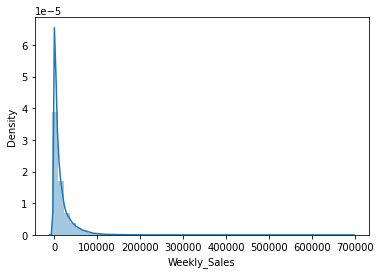

In [ ]:
#Since our target is sales,lets see what is it and what its distribution is.
sns.distplot(train['Weekly_Sales'])
plt.show()


This y_target is definitely positively skewed,we can see it using  below.
mean,median,mode =  [15981.258123467243, 7612.03, 0    10.0]
but it doesn't matter.I read a little about it,but it seems it does not matter much.


In [ ]:
#positive skewed.(Results)
train['Weekly_Sales'].mean(),train['Weekly_Sales'].median(),train['Weekly_Sales'].mode()
#https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

(15981.258123467243, 7612.03, 0    10.0
 dtype: float64)

Adding the new features of month and week they really help to see the data in a magnified view,and with hue

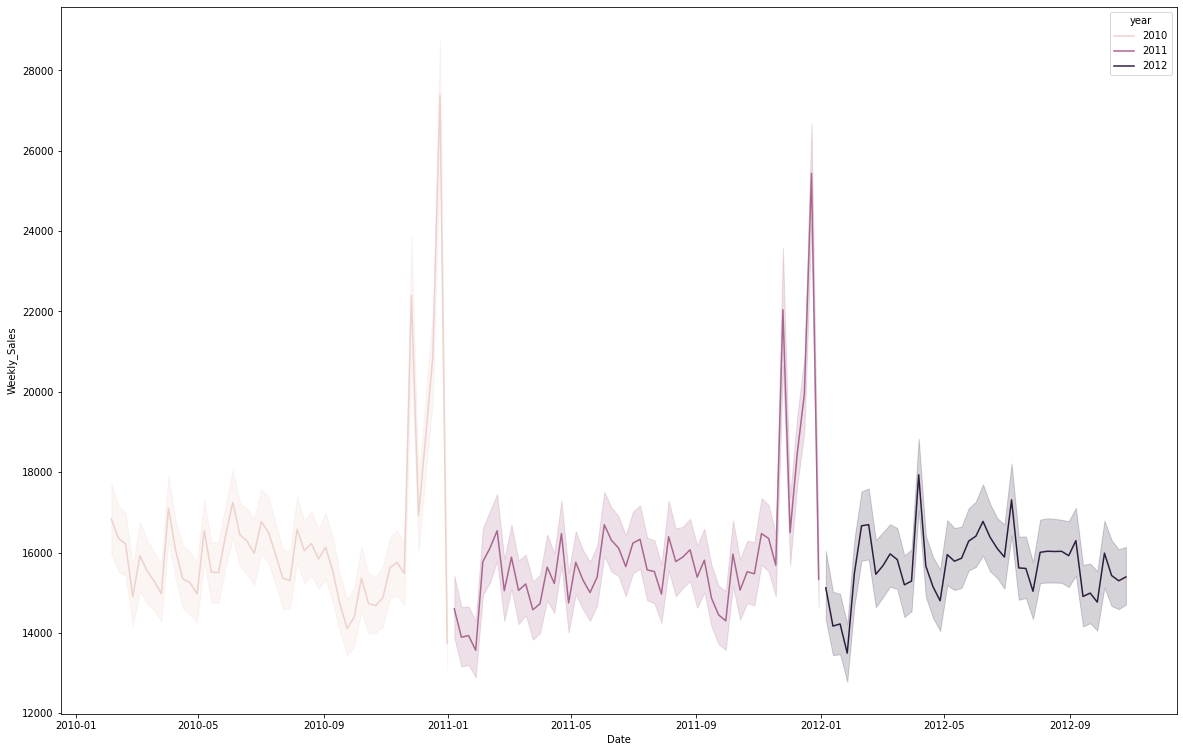

In [ ]:
plt.rcParams['figure.figsize'] = [20, 13]#increasing the figure size.
sns.lineplot(data=df_train, x="Date", y="Weekly_Sales",hue = 'year')

This  provided is a line plot for the data provided to us.Observing this tell us tht from around the ending of 2010 to 2011,there is a very high demand in Sales,and the same pattern repeats for the year 2011-2012.
* this graph definately follows a pattern, probably this is due to holiday.
* there is no trend here,but cyclical behaviour over the time of two years and near the end of each year.
* probably the population is christians
* by the looks of it the data seems to be stationary later we can run **Dicky Fuller** test to further strengthen our analysis


In [ ]:
#Since we basically know now a little about our Store Sales data,lets look at each of the feature present 

## Store,Type,Size,Dept

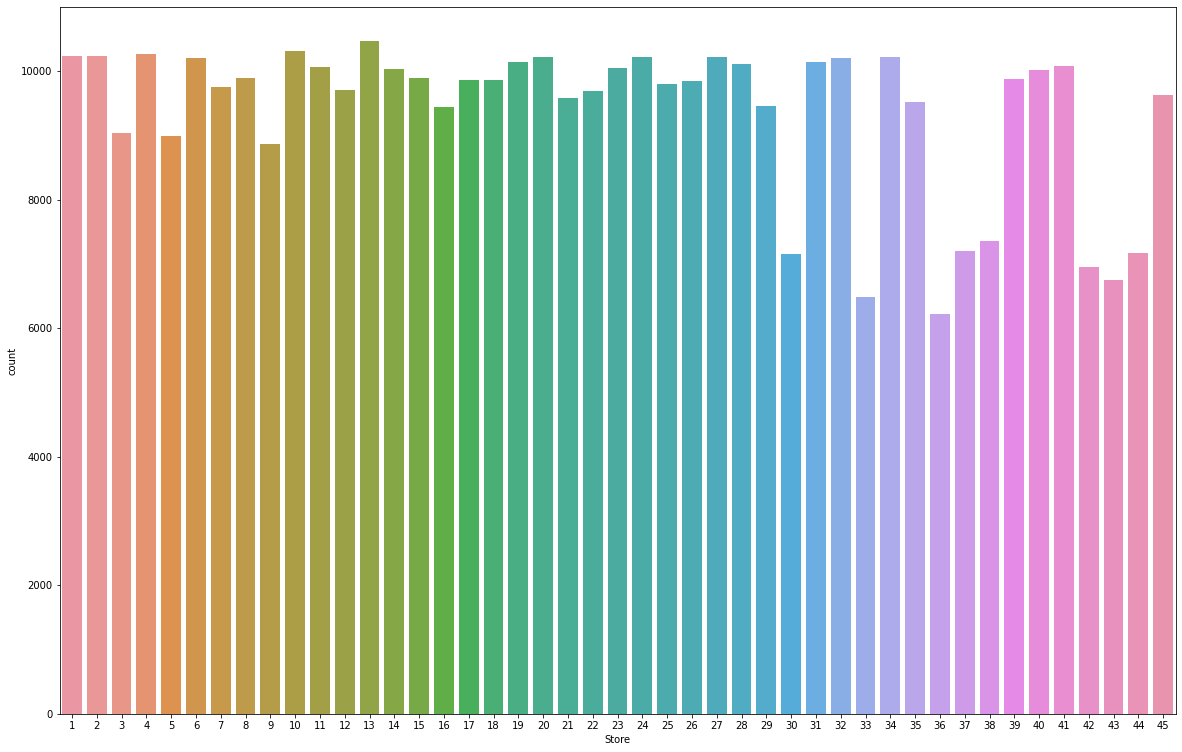

In [ ]:
sns.countplot(x="Store", data=df_train)



Clealy all the stores which are 45 ,are equal every where except for few like 30,33,35,36,and few more.

In [ ]:
#lets see their sizes

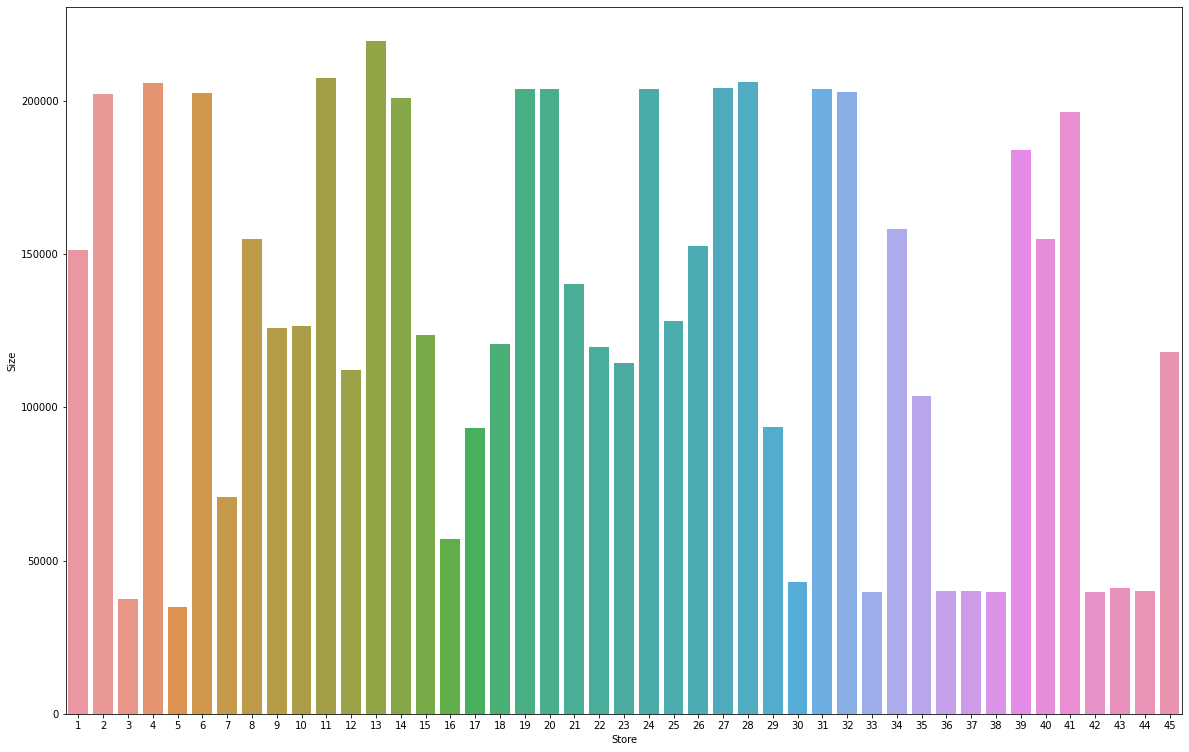

In [ ]:
sns.barplot(x="Store", y="Size", data=df_train)
#store vs size


Clearly we can see the stores are small,medium,large.We can remove these features with simple categorical features laters if neecessary

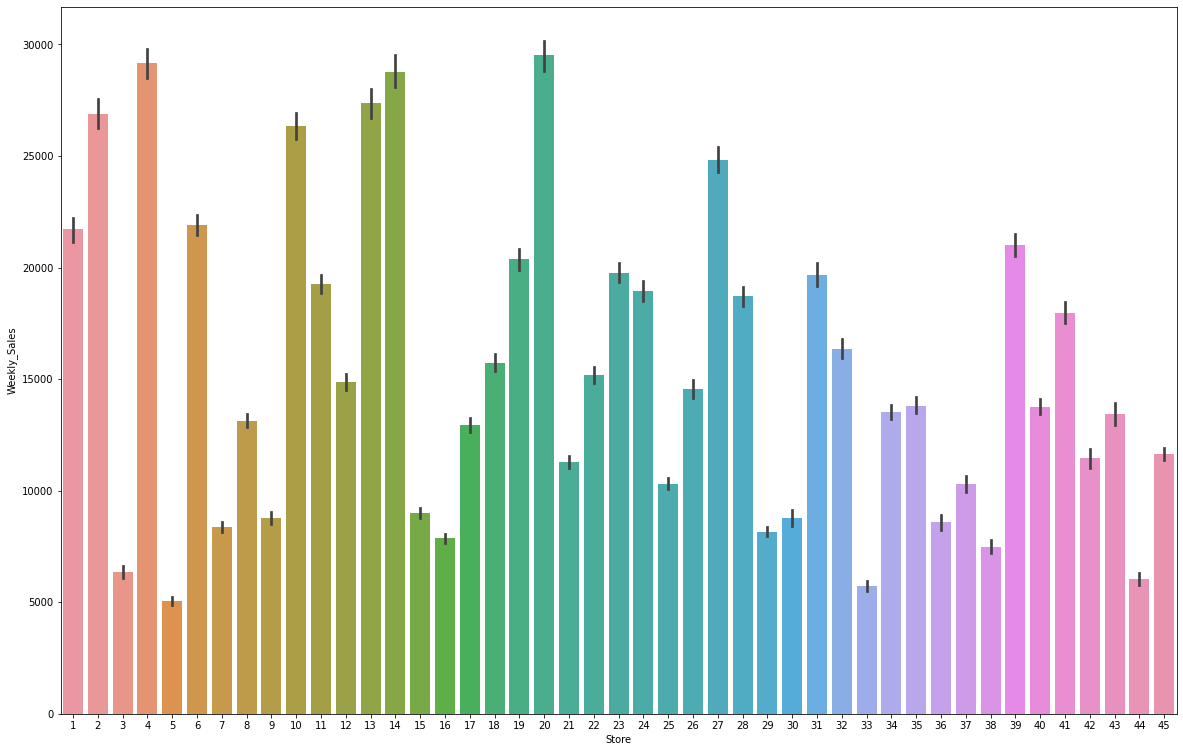

In [ ]:
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
# store vs weekly sales

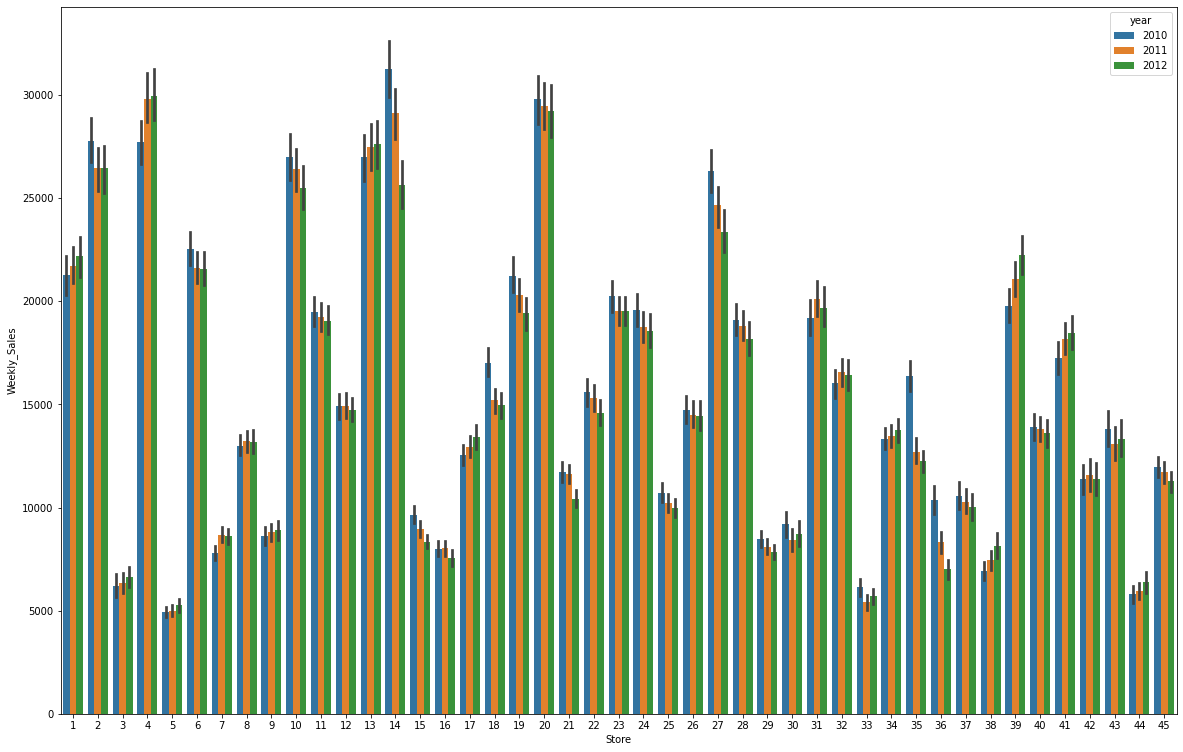

In [ ]:
sns.barplot(x="Store", y="Weekly_Sales", data=df_train,hue = 'year')
#store vs weekly sales with years

Plotting the values here gives us a good understanding that for most for the stores,which are present.
A special case here is ,
some  big stores provide the less/same profit as the other's of small and equivlent size.
For eg we can see 9 and 10,9 being the bigger store generate less profit thenn the 10 which is  the same size and  for 42 and 43 ,generates heavy sales,even when they are of small size.

Looking at these for stores from 0 to 20 in all years[10-11-12] on average have had more sales,then the rest = (22),
However the lower sales area remain's similar to the rest(22).
(can be checked via our previous graph)

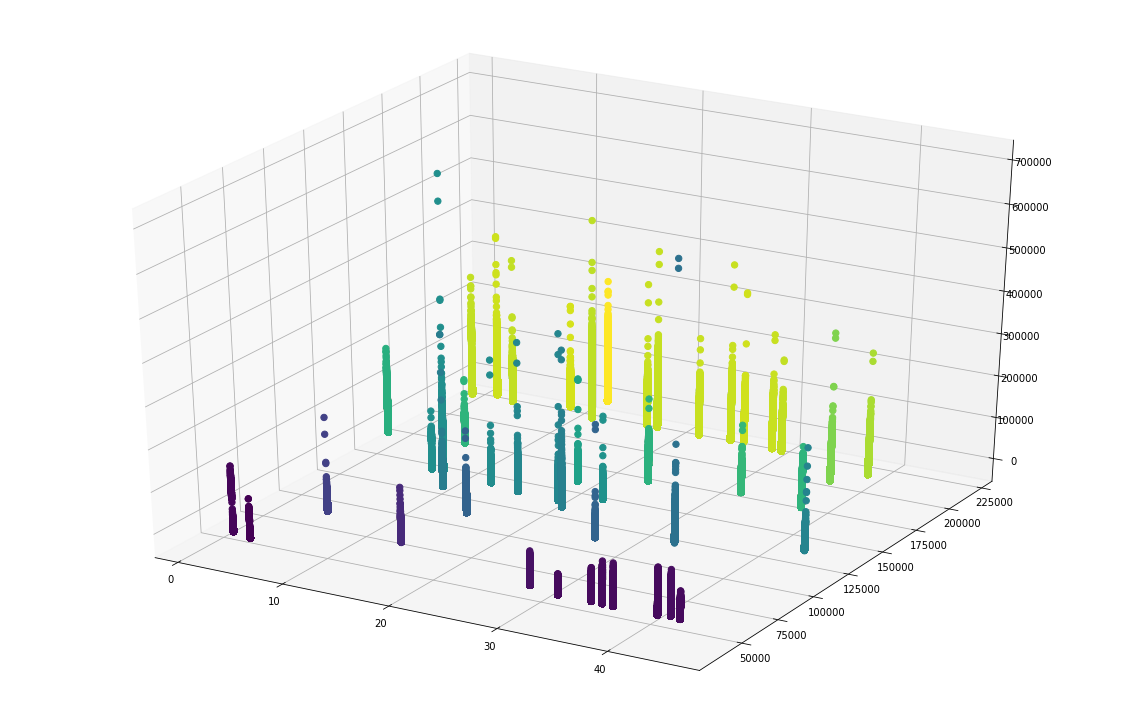

In [ ]:
ax = plt.axes(projection ="3d")

ax.scatter3D(df_train['Store'],  df_train['Size'],df_train['Weekly_Sales'], s=40, c= df_train['Size'], marker='o', alpha=1)
plt.show()
#store vs size vs weekly sales


Here we have a 3D plot where we have the 45  stores ,matched with sizes of y axis and sales and z axis.Similar to the above conclusion,as the size increases so does the sales,however some stores show more sales then bigger stores.

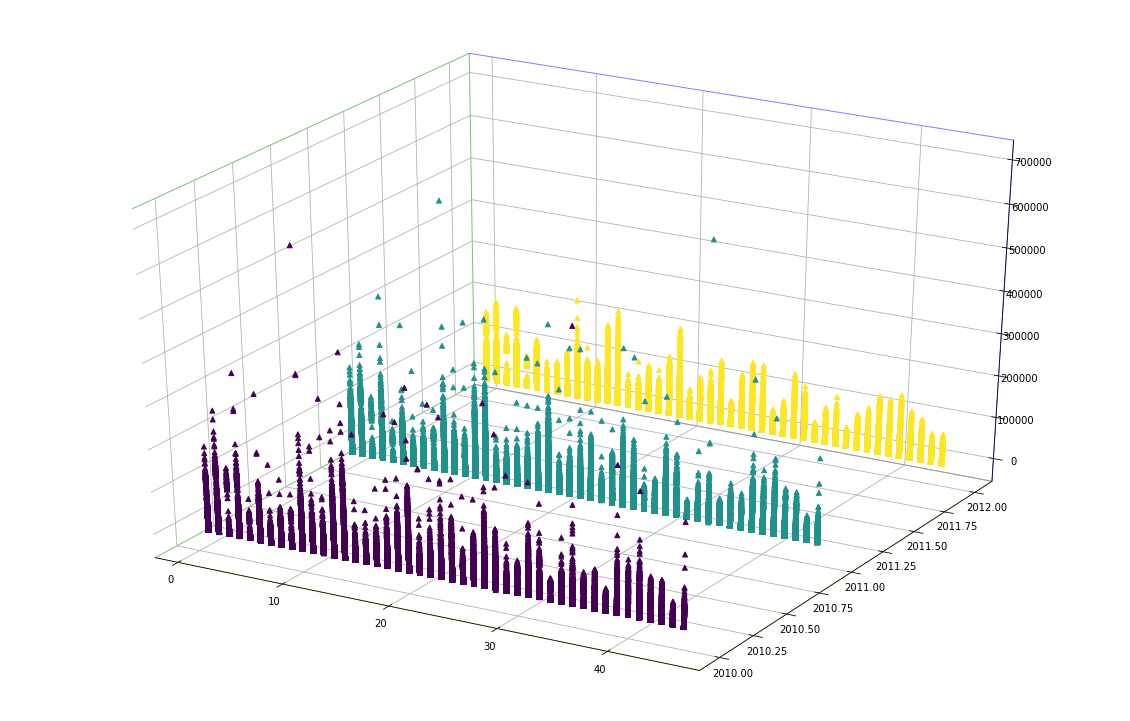

In [ ]:
ax = plt.axes(projection ="3d")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('g')
ax.yaxis.pane.set_edgecolor('b')
ax.zaxis.pane.set_edgecolor('y')
ax.scatter(df_train['Store'],  df_train['year'],df_train['Weekly_Sales'], s=25, c= df_train['year'], marker='^', alpha=1)
plt.show()
#store vs year vs weekly sales

Same conclusion as above,in 2d plot.

In [ ]:
#moving towards the type plot

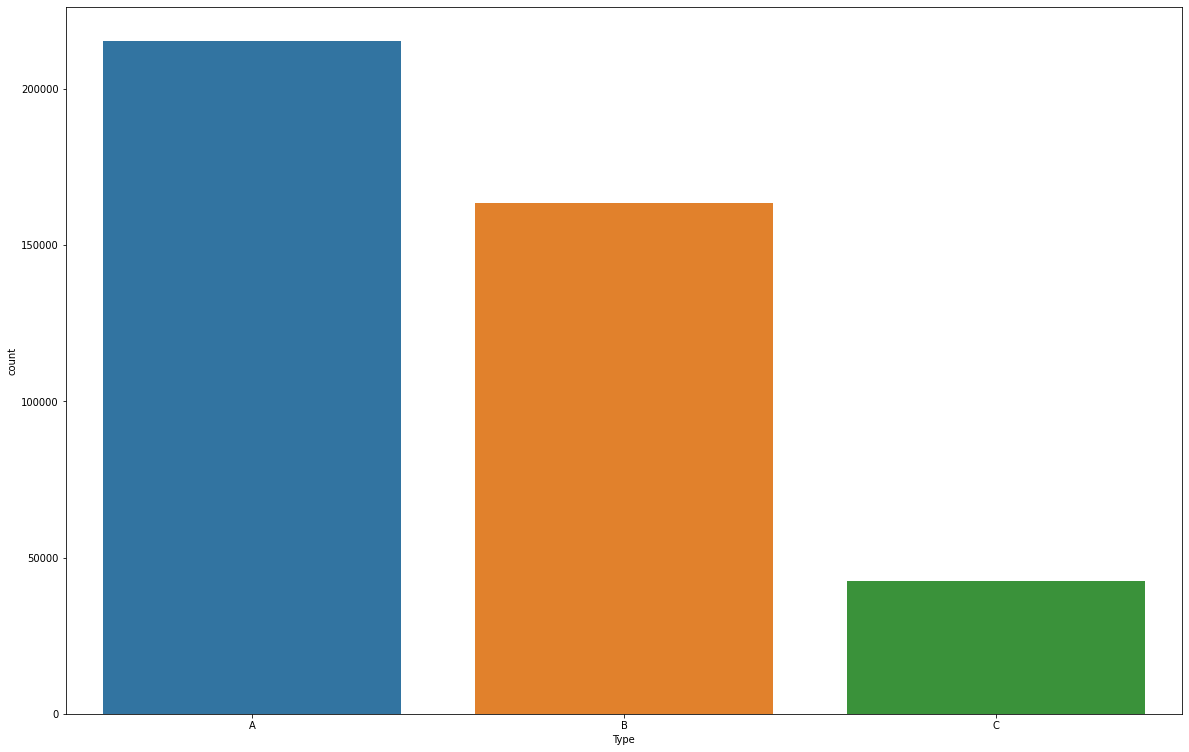

In [ ]:
sns.countplot(x="Type", data=df_train)
#there's no  doubt here that the type A stores are the largest,my assumption is that they will probably be having the largest sales also.
#also seems that the  type,is how the sizes are divided.
#Type and count


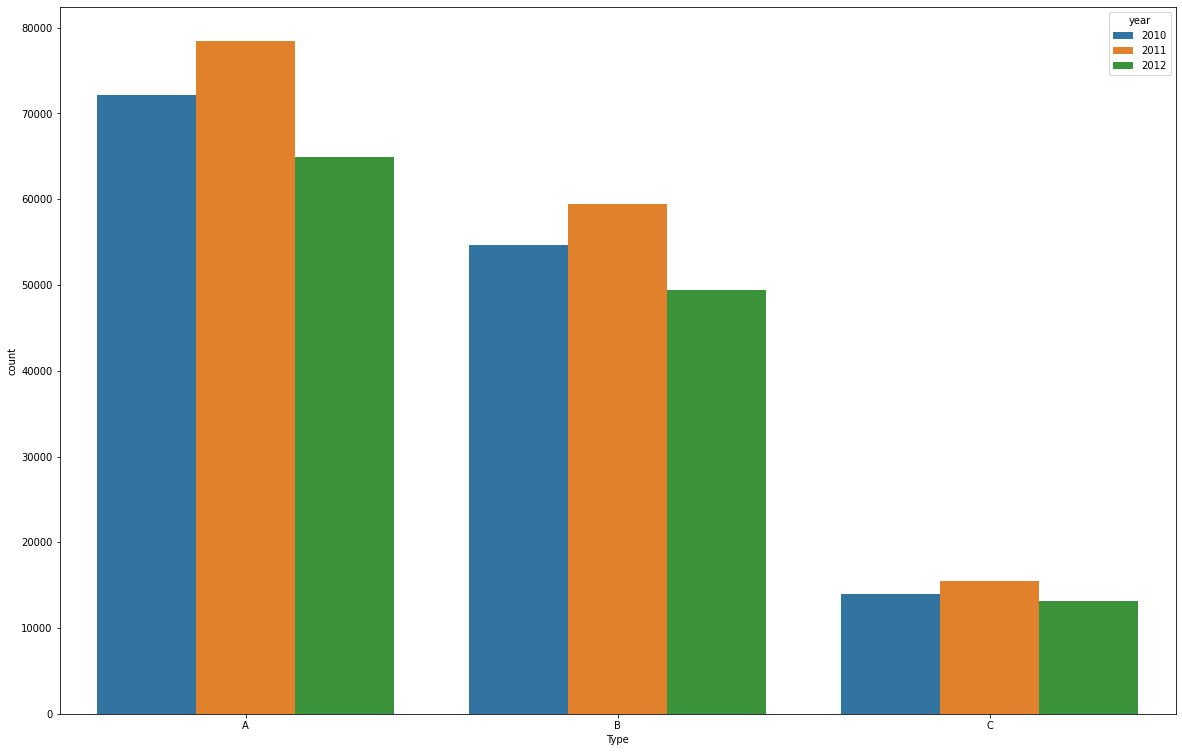

In [ ]:
sns.countplot(x="Type", data=df_train,hue = 'year')
#Type vs Count with years

The count of the store B is higher then the count for the type A.Also the number of stores are decreasing.Probably the closed some stores.


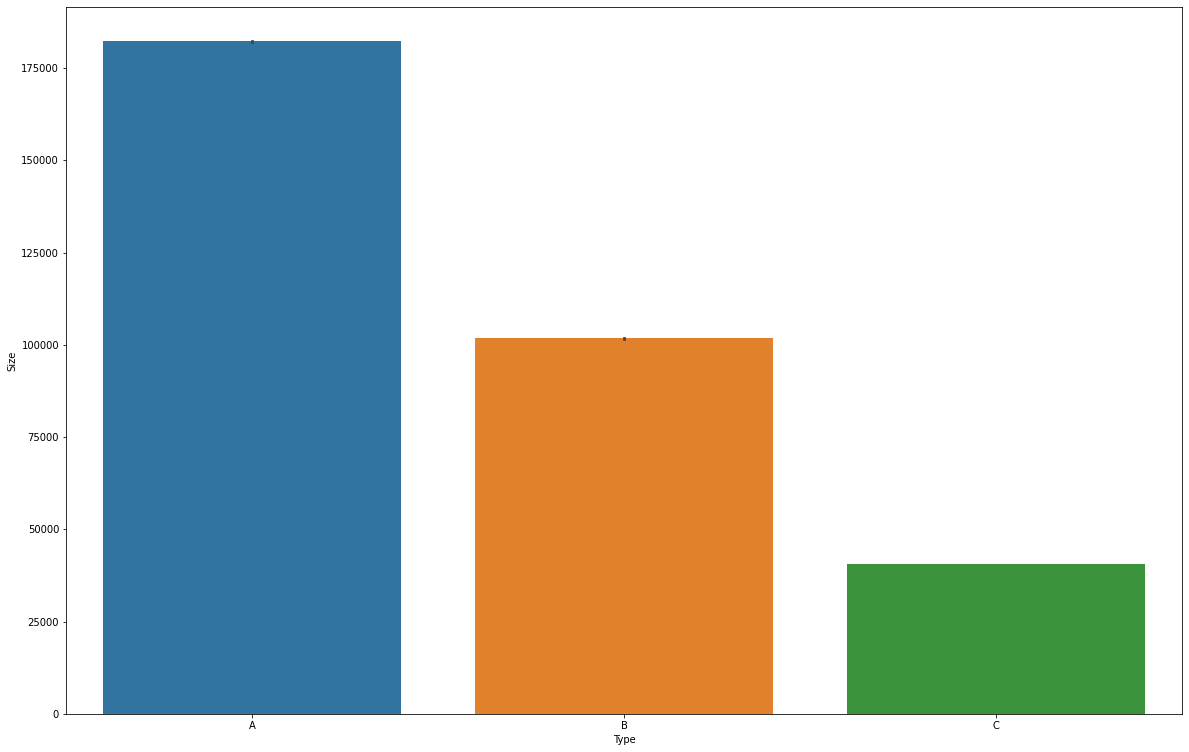

In [ ]:

sns.barplot(x="Type", y="Size", data=df_train)
#Type vs Size

TYPE A are the larges
TYPE B are the medum
TYPE C are the comparitively very small in counts and in Size.
Sales here for A are very high,for B and C ,the sales seems to be almost same.(Probably Type B stores are not doing much good.)


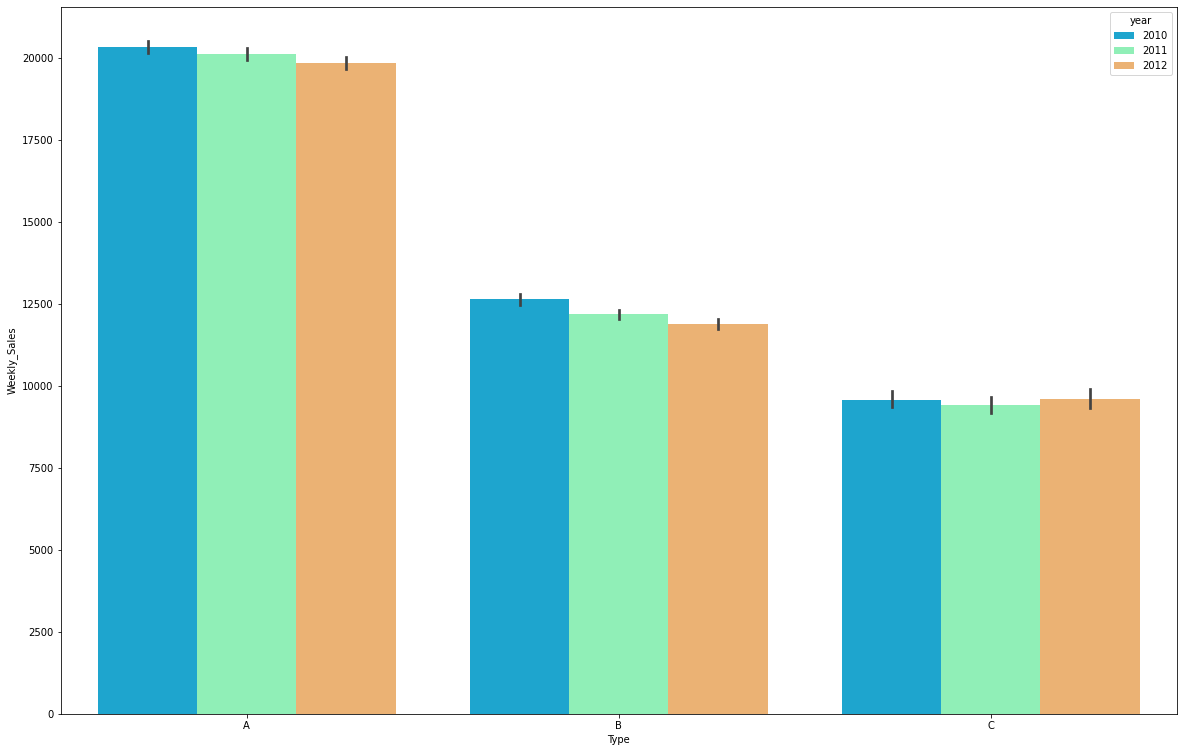

In [ ]:
sns.barplot(x='Type',y='Weekly_Sales',data= df_train, palette='rainbow',hue = 'year')
#Clearly the store A which is big and is larger in size definately 
#Type Store works
#Type vs Weekly Sales vs year


Lets look at the year wise  
Definately Type A outperform B and C,then Band C  closely following the B sales
Size and Store and Type seems to be an important part in determining the weekly sales it seems.

In [ ]:
#Here now lets look at the type,size weekly sales

In [ ]:
#here i am converting all values into three numericals for plotting.

In [ ]:
df_train['Type'] = df_train['Type'].replace("A", int("1"), regex=True)
df_train['Type'] = df_train['Type'].replace("B", int("2"), regex=True)
df_train['Type'] = df_train['Type'].replace("C", int("3"), regex=True)


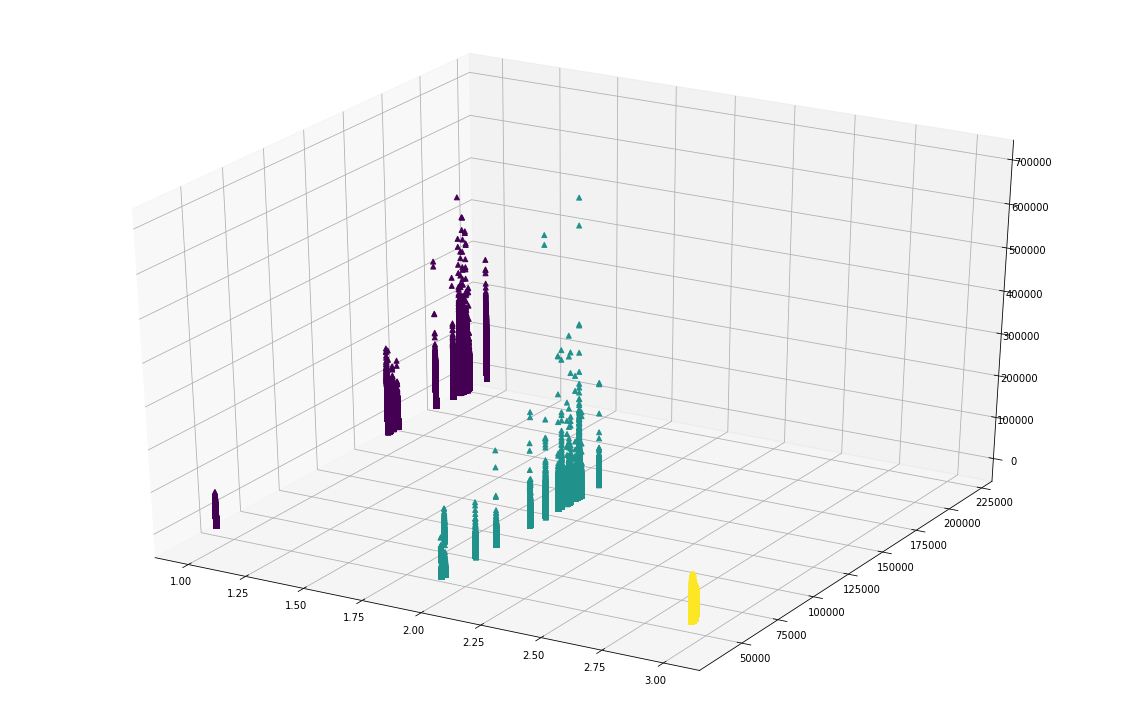

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Type'],df_train['Size'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
#type vs size vs weekly sales

Similar to above we have three types,A is the largest with most of the sales and c is the smalles with the lesser sales

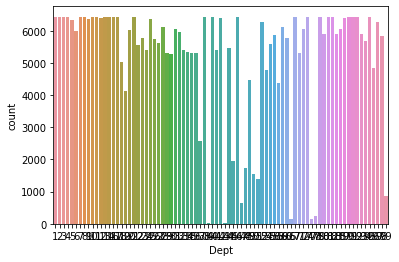

In [ ]:
#Lets see for departments
sns.countplot(x="Dept", data=df_train)

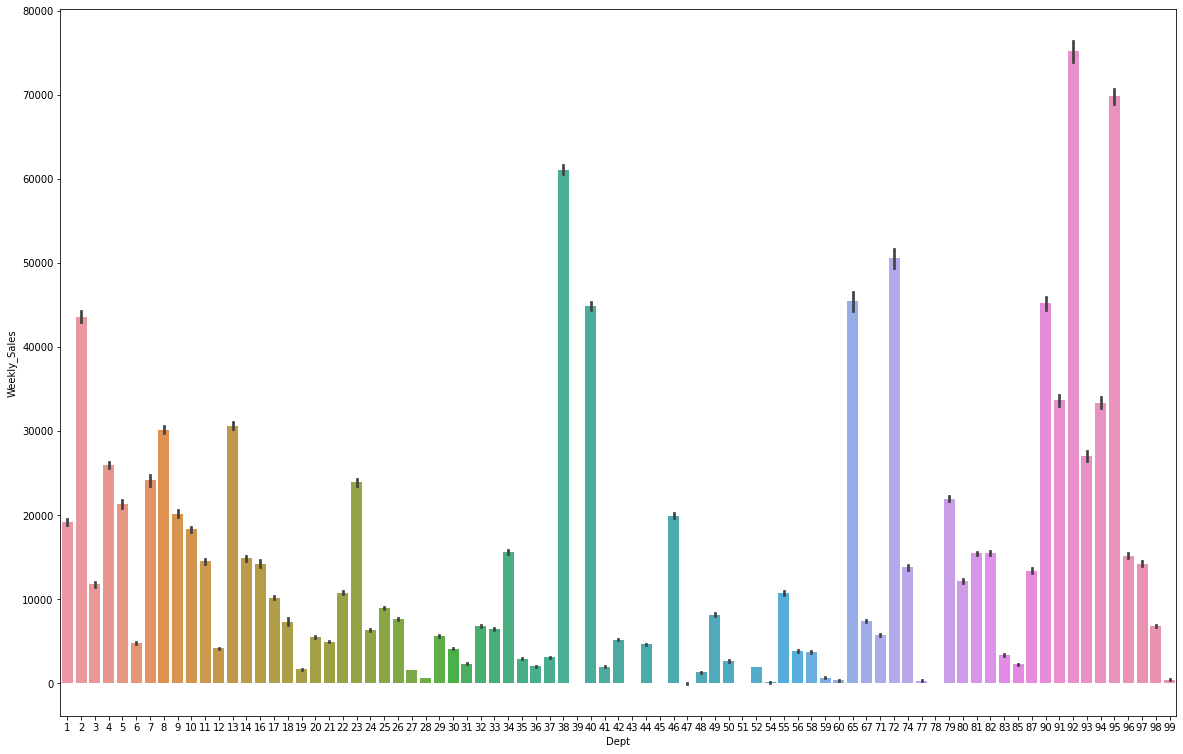

In [ ]:
sns.barplot(x="Dept",y = 'Weekly_Sales', data=df_train)

from above we can see that for some department,the sales were higher

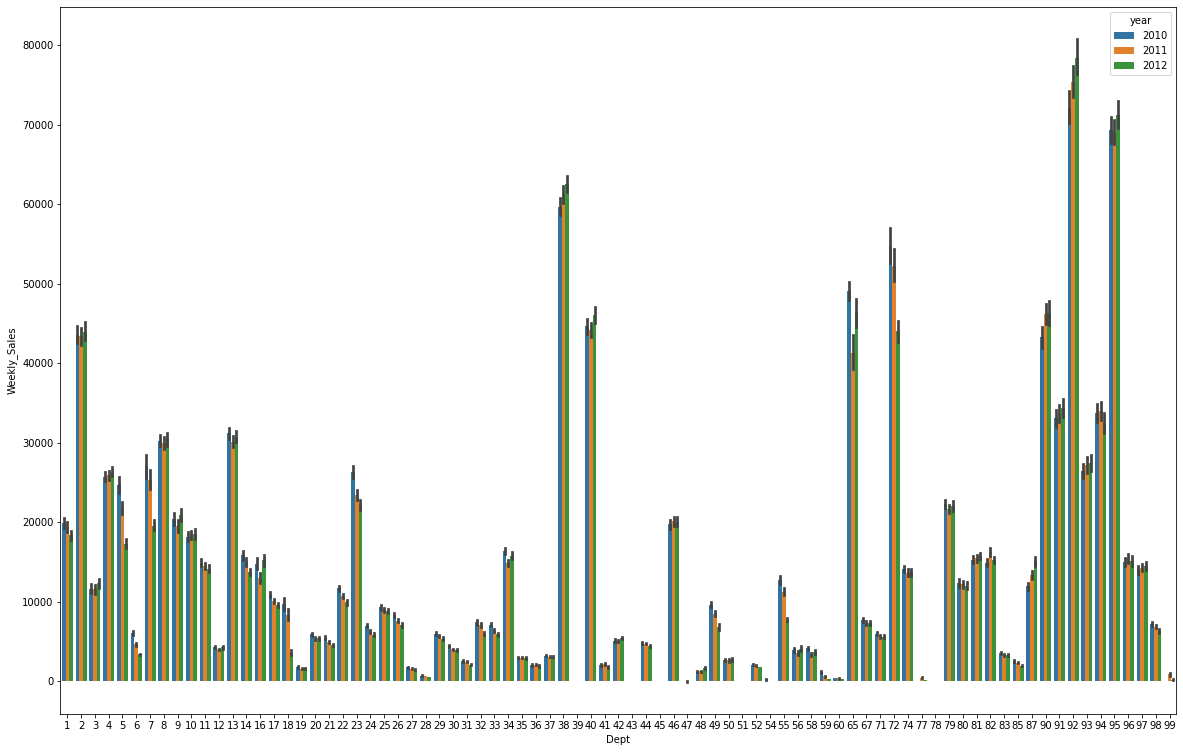

In [ ]:
sns.barplot(x="Dept",y = 'Weekly_Sales', data=df_train,hue = 'year')

Sales were higher and same for the same dept all over the years.Also as weekly sales seems correlated with the value

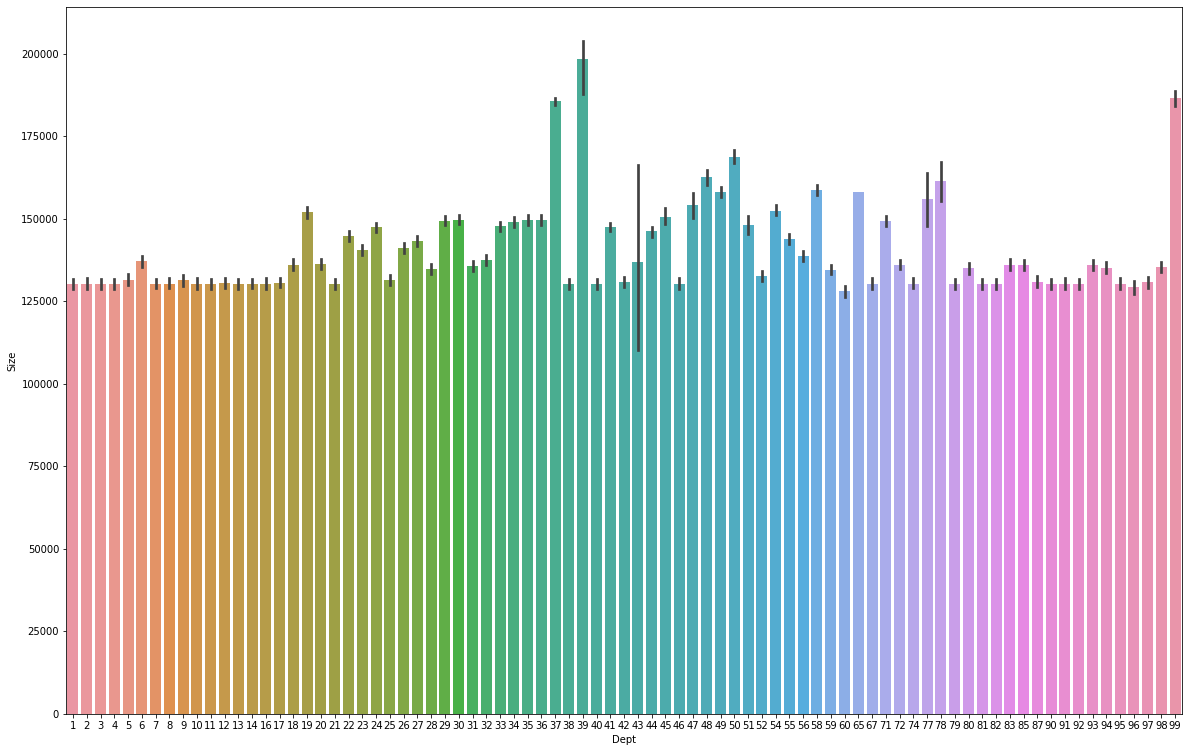

In [ ]:
sns.barplot(x="Dept",y = 'Size', data=df_train)

In [ ]:
#All Departments looks like were of similar size.Except for some.

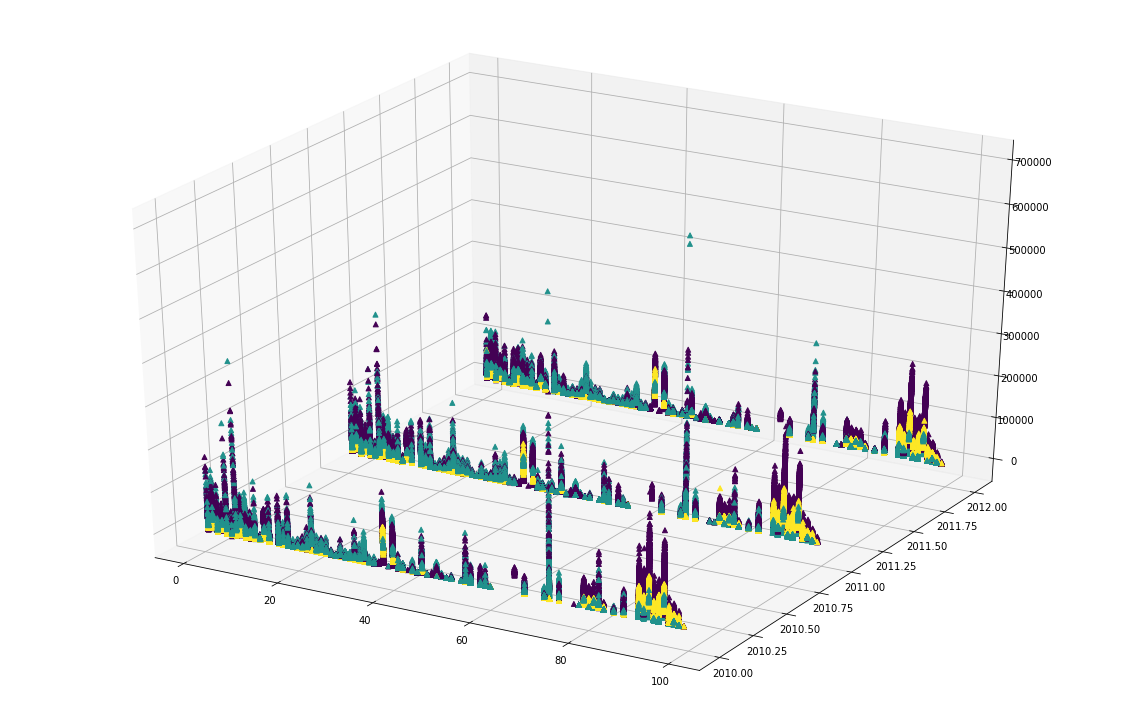

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Dept'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
#type vs size vs weekly sales

Nothing new here,same conclusions as above

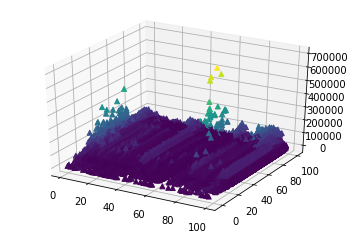

In [ ]:
#trying out the relation with other features
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Dept'],df_train['Temperature'], df_train['Weekly_Sales'], s=25, c= df_train['Weekly_Sales'], marker='^', alpha=1)
#type vs size vs weekly sales

As temperature rise or drop,i thought sales in certain dept will increase but doesn't seems to be the case here

From the above examined features all features effect the Weekly_Sales ,so they are important for the target variable.
Therefore Store,Dept,Size all effect the weekly sales

# TEMPERATURE,UNEMPLOYMENT,HOLIDAY
In this section while doing the 3d analysis I am directly using the above features which i have found important with the target variable.

In [ ]:
#I think calculating or seeing seprately the values of temperature will not make much diffrence so  I am directly doing  Bivariate analysis .

In [ ]:
#Now lets see another variable Holiday

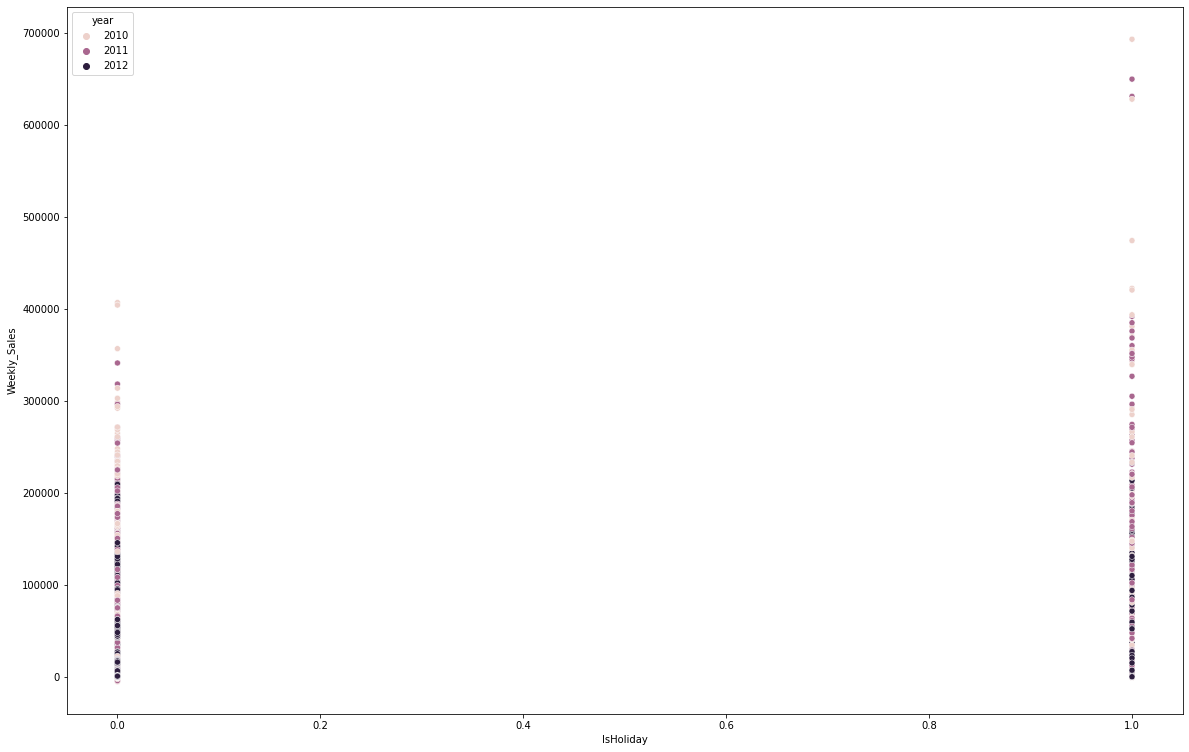

In [ ]:
sns.scatterplot(x='IsHoliday',y='Weekly_Sales',data= df_train,hue = 'year')

 Definately the sales were a little higher during holidays.

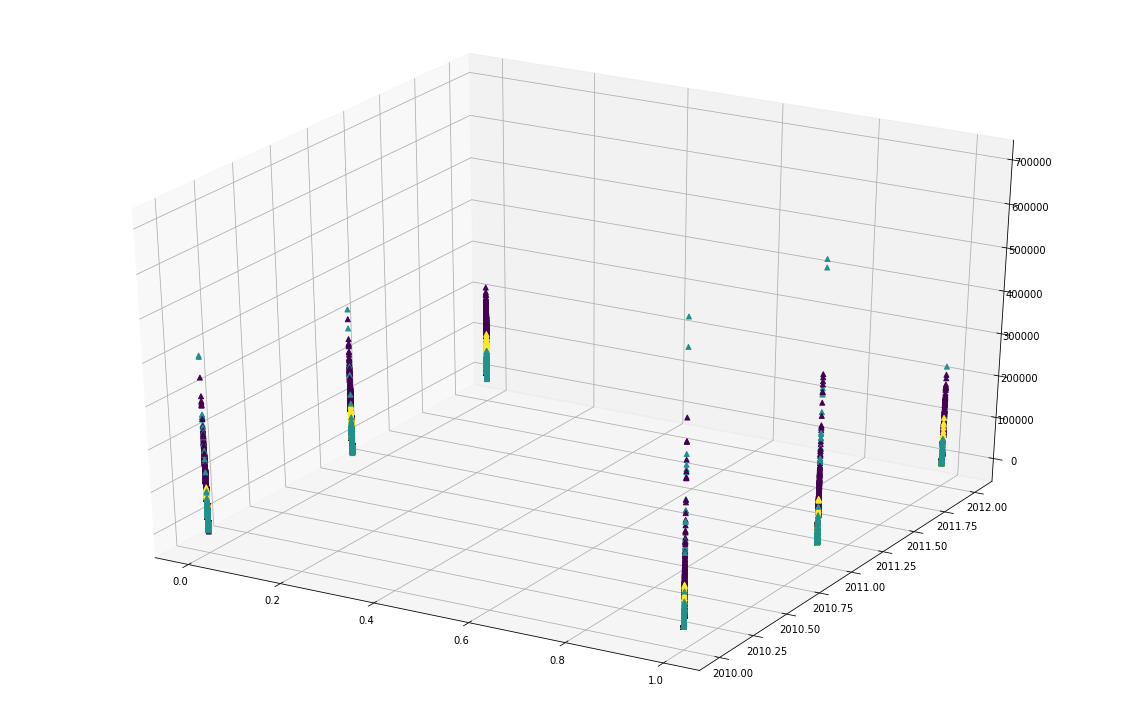

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['IsHoliday'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
plt.show()

type A definately has a higer sales in density,but B seems to have the highest sales on holiday,
Type as we saw are generally smaller in size comparitively with B but has higher sales during the holiday

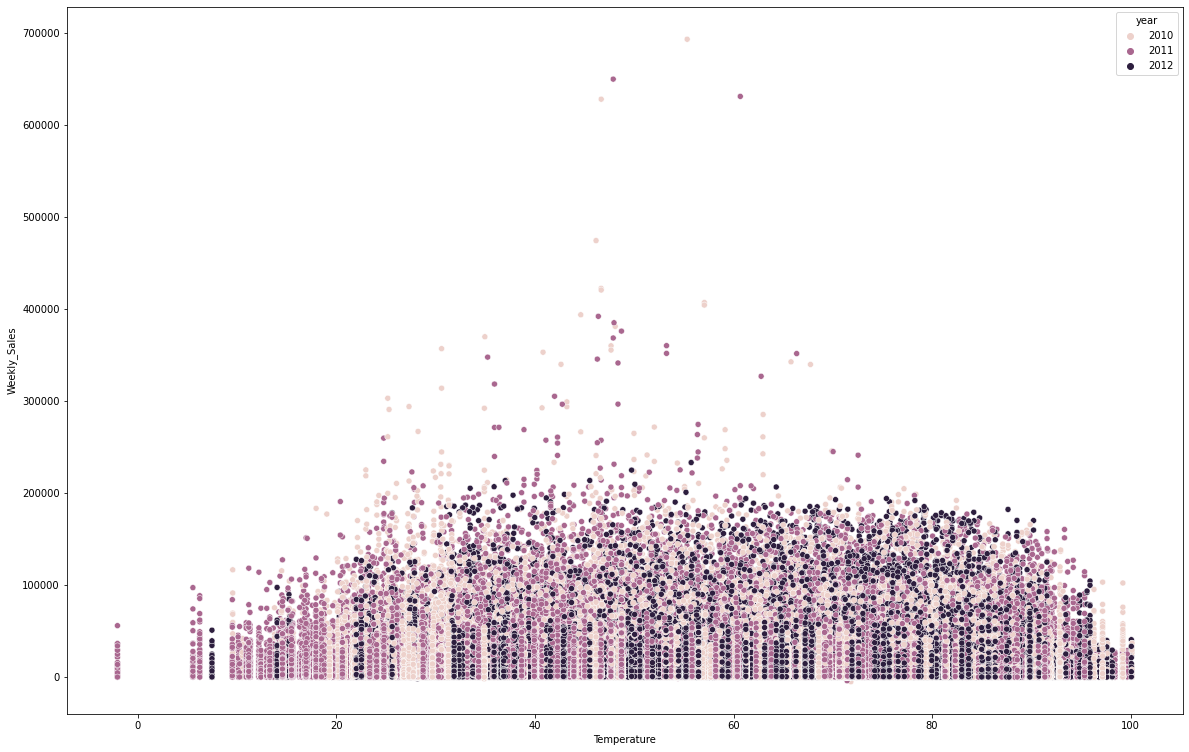

In [ ]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data= df_train,hue='year')
#nothing observed here

I don't see much relavence here.
Temperature doesn't seem that important,probably non collinear with sales

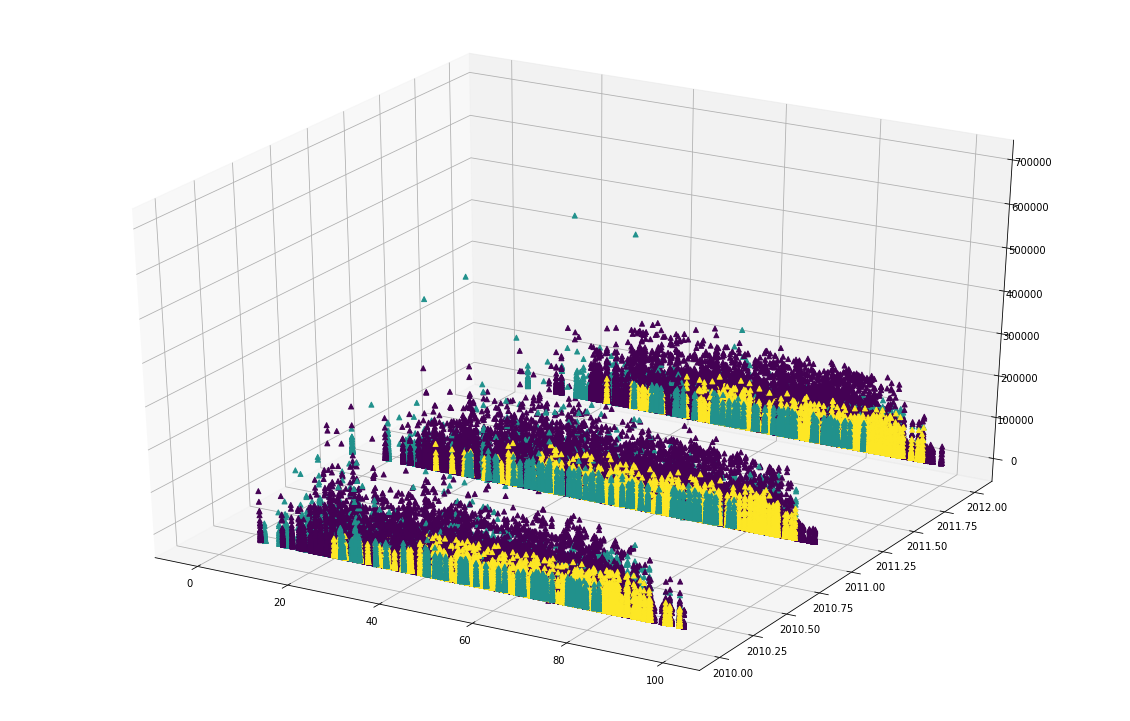

In [ ]:

ax = plt.axes(projection ="3d")
ax.scatter( df_train['Temperature'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
plt.show()
#temp vs year vs weekly sales,diffrentiated with type

Temperature doesn't seem to have any correlation at all

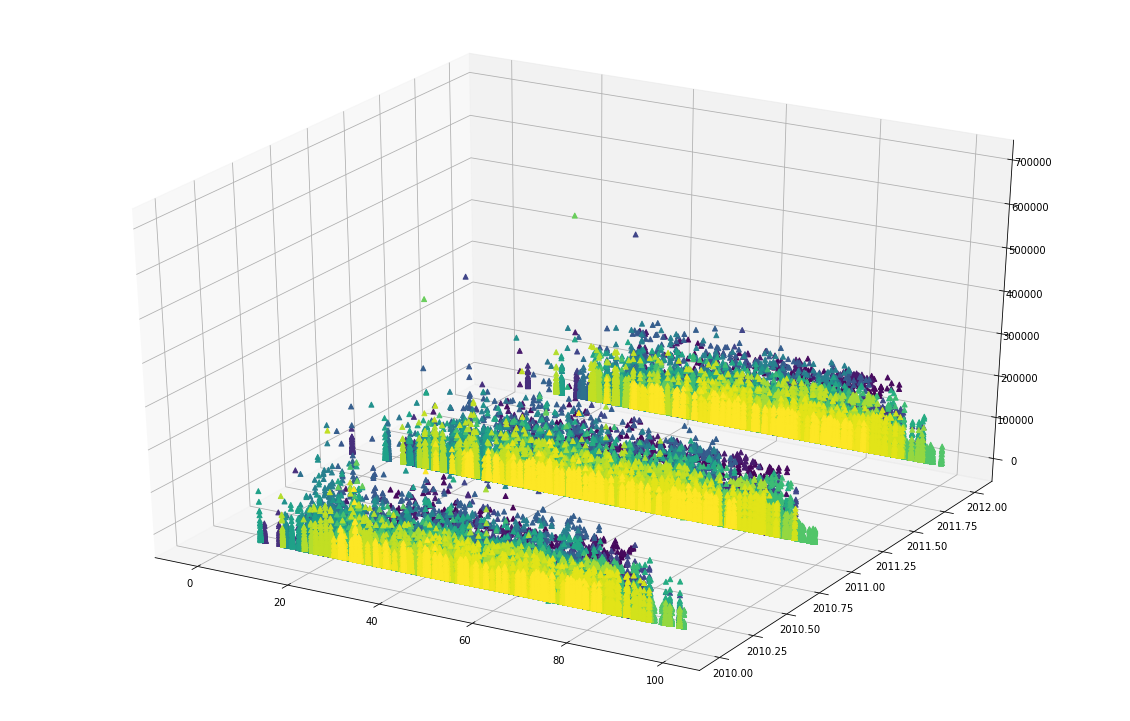

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Temperature'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Store'], marker='^', alpha=1)
plt.show()
#temp vs year vs weekly sales,diffrentiated with stores

In [ ]:
#Still i find no correlation here 

In [ ]:
#plt.scatter(x='Fuel_Price',y='Weekly_Sales',data= df_train)

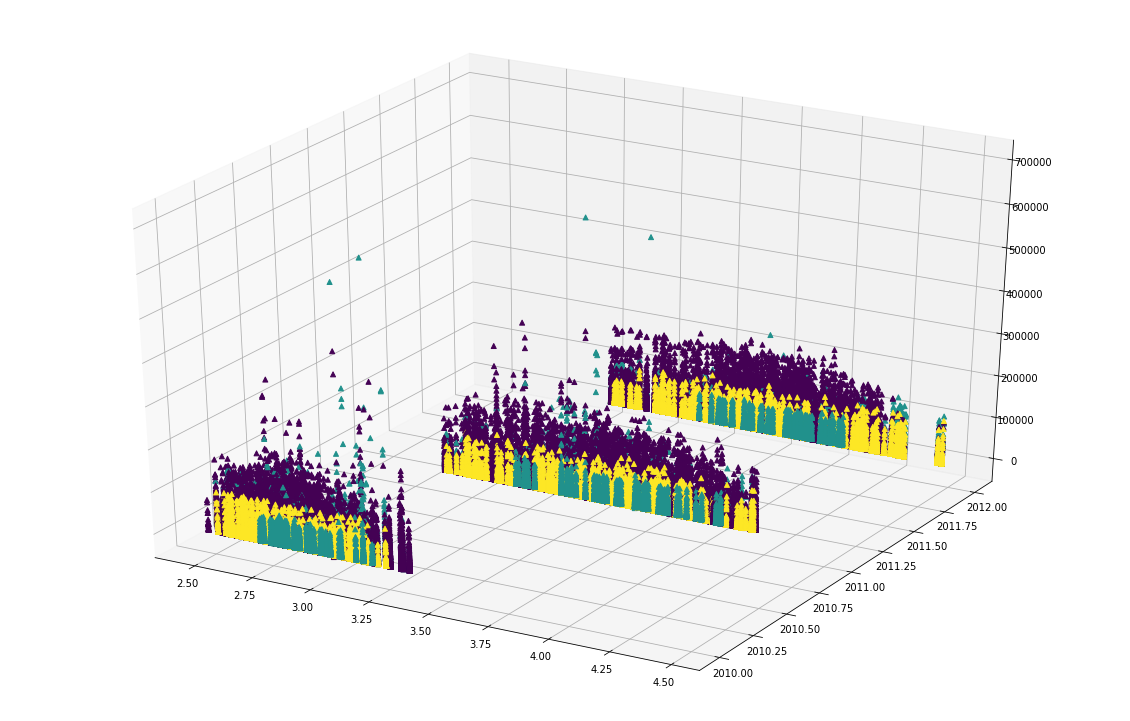

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Fuel_Price'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
plt.show()

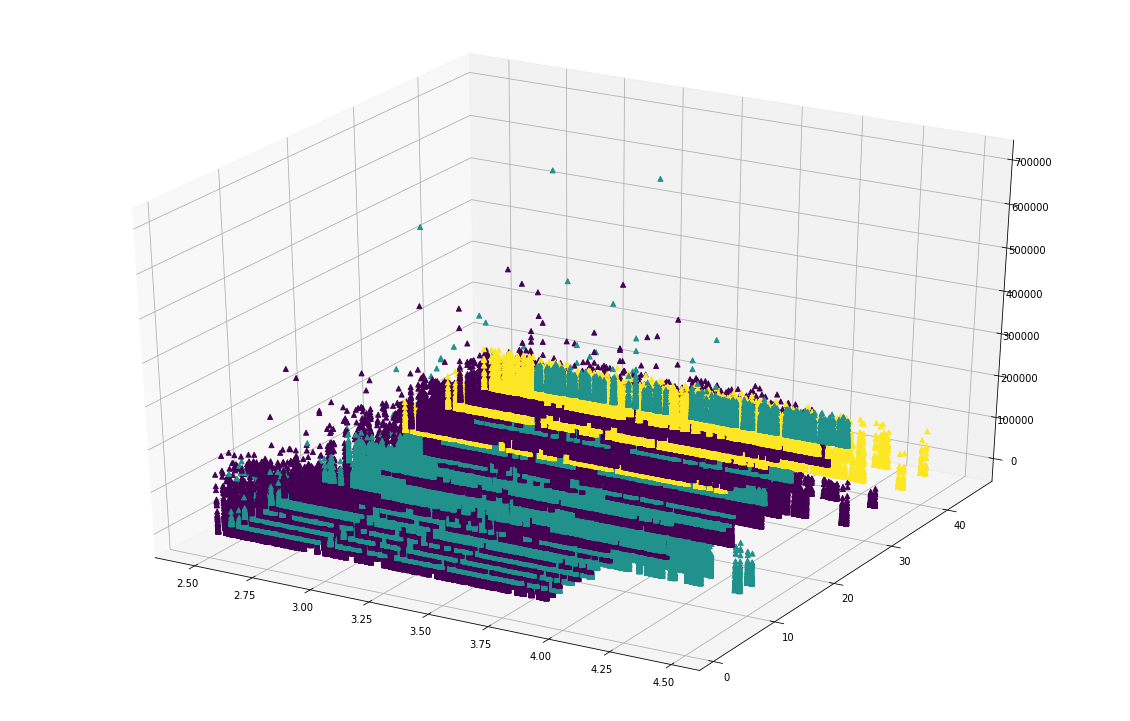

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Fuel_Price'],df_train['Store'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
plt.show()

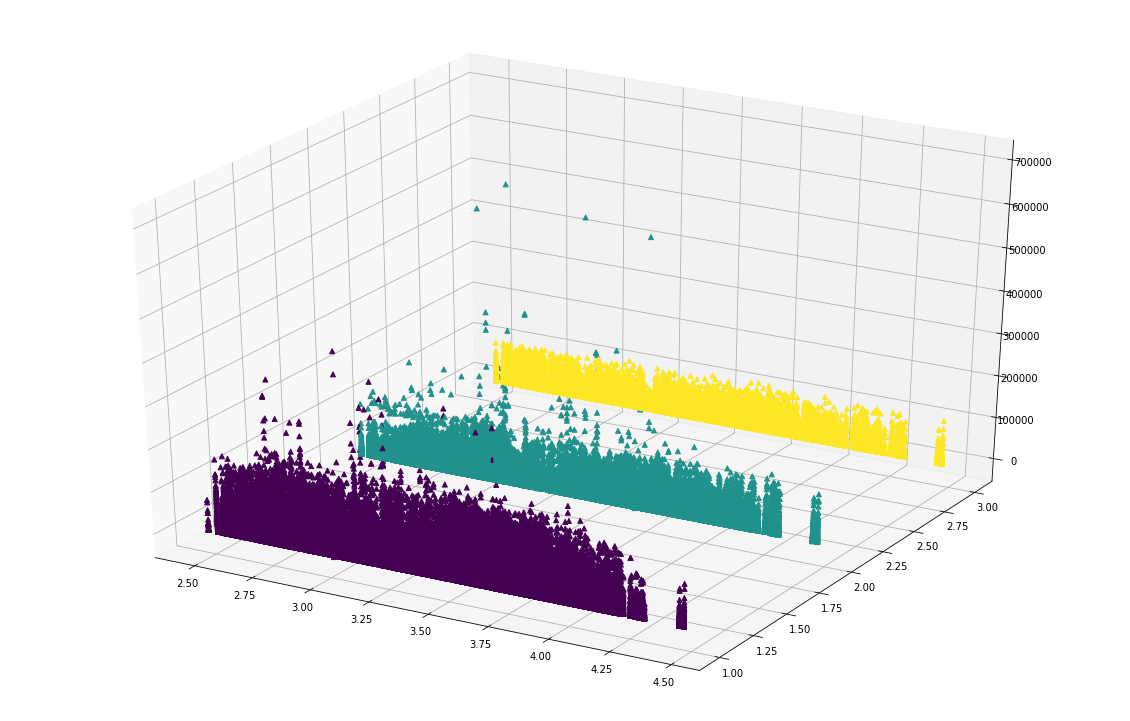

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Fuel_Price'],df_train['Type'], df_train['Weekly_Sales'], s=25, c= df_train['Type'], marker='^', alpha=1)
plt.show()
#fule_price vs Type vs Weekly_Sales with type

No correlation with the target variable of fuel price or store size
Similarly for fuel price,


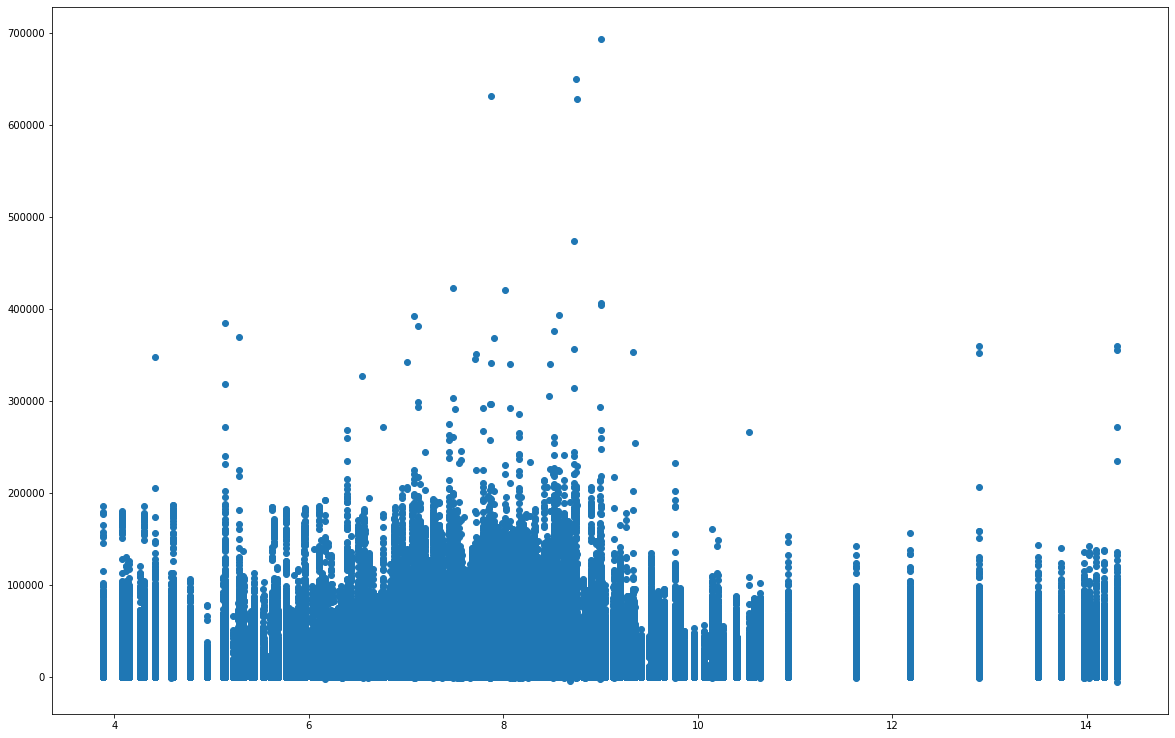

In [ ]:
plt.scatter(x='Unemployment',y='Weekly_Sales',data= df_train)

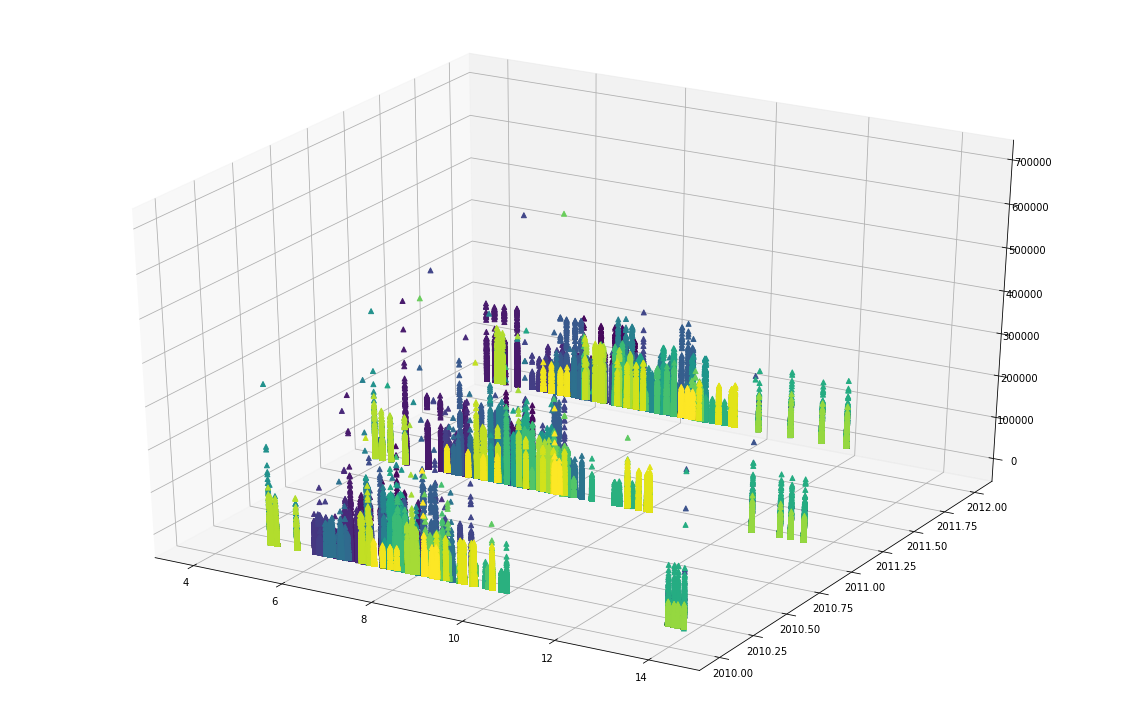

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['Unemployment'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['Store'], marker='^', alpha=1)
plt.show()

Similarly for Fuel price
Employment doesn't seem that important,probably non collinear with sales

In [ ]:
#Seens no effect on sales,
#lets just look at pairplots to see if anything is actully effected??

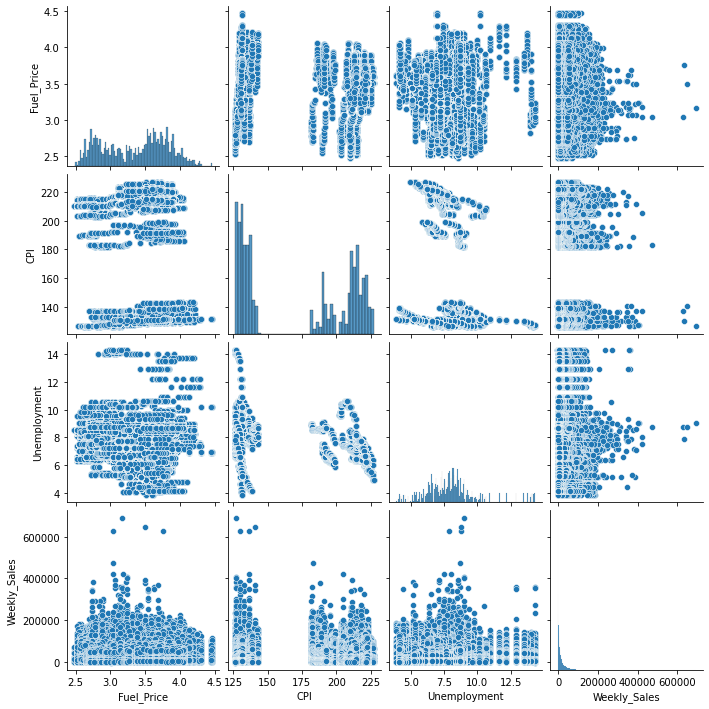

In [ ]:
sns.pairplot(df_train, vars = ["Fuel_Price","CPI","Unemployment","Weekly_Sales"], dropna = True)

it doesnt look any of these things have any  effect sales.Since our target variable remain uneffected so these again has no relevance

MARKDOWNS

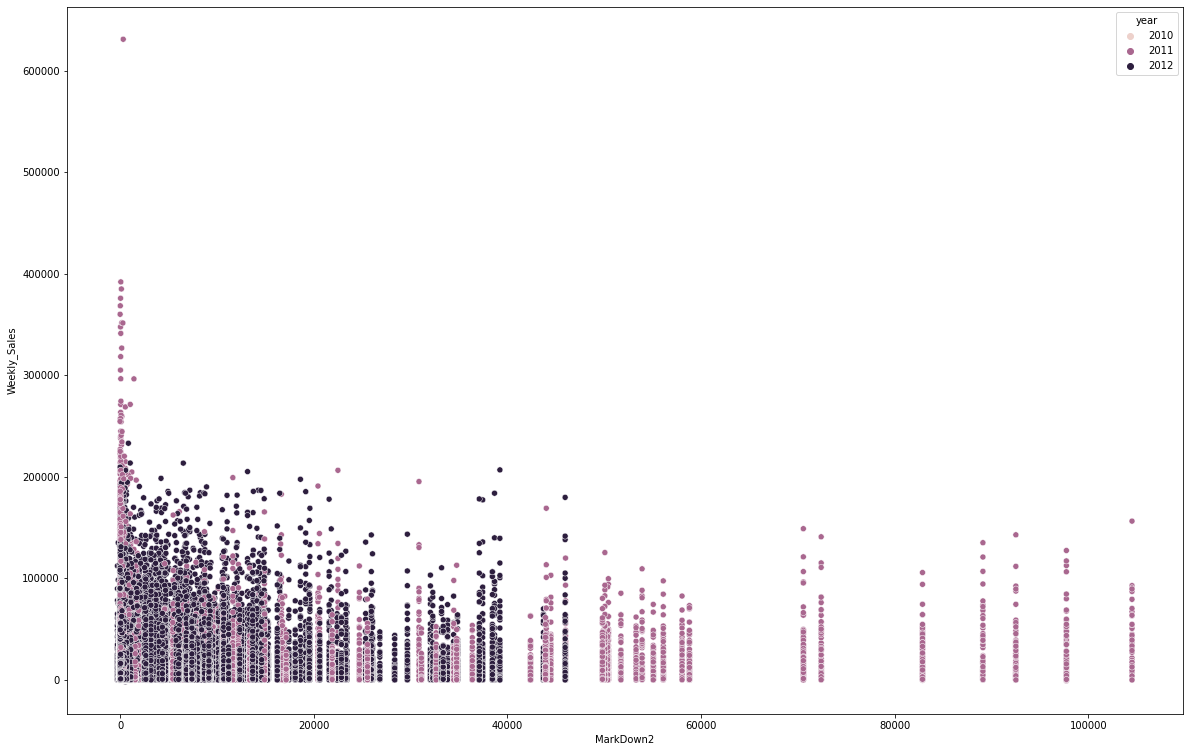

In [ ]:
sns.scatterplot(x='MarkDown2',y='Weekly_Sales',data= df_train,hue = 'year')

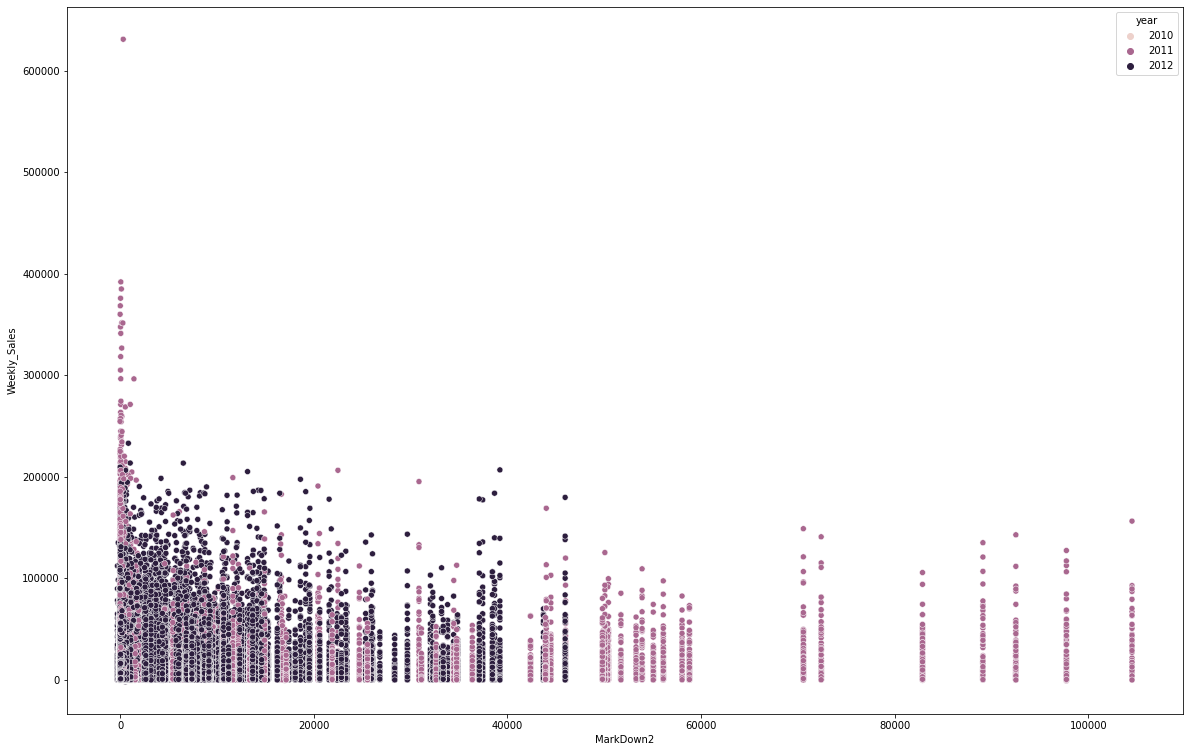

In [ ]:
sns.scatterplot(x='MarkDown2',y='Weekly_Sales',data= df_train,hue = 'year')

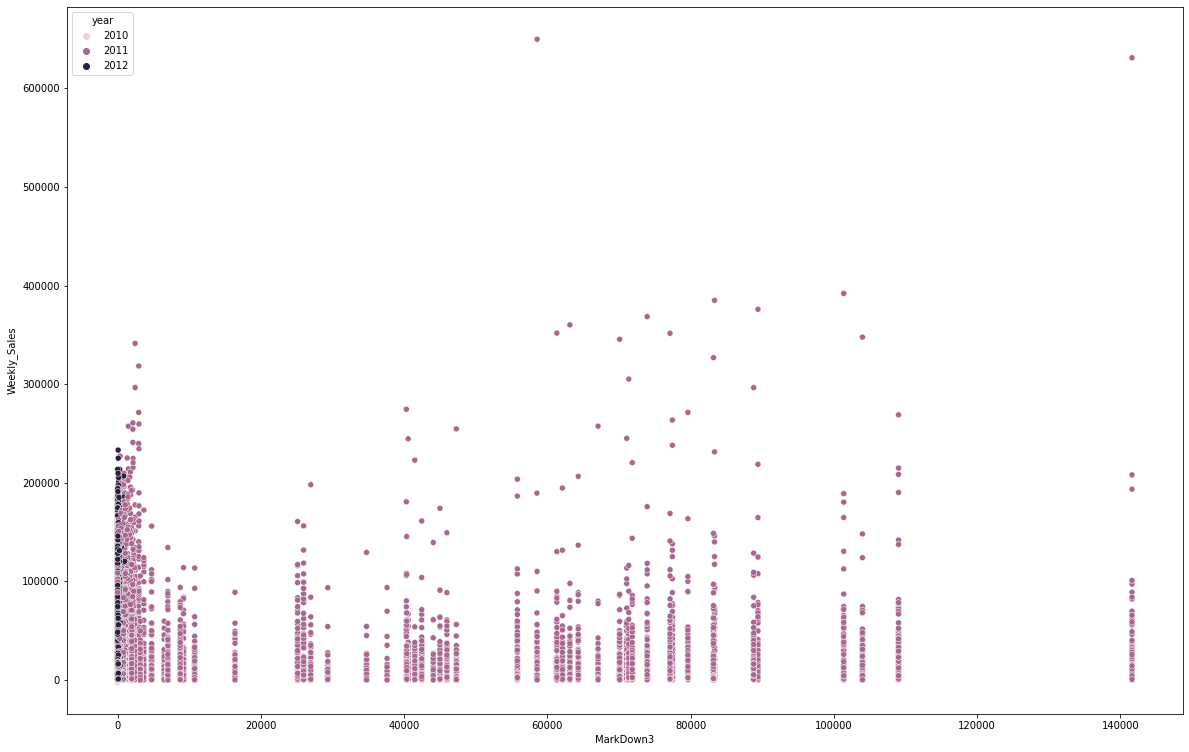

In [ ]:
sns.scatterplot(x='MarkDown3',y='Weekly_Sales',data= df_train,hue = 'year')

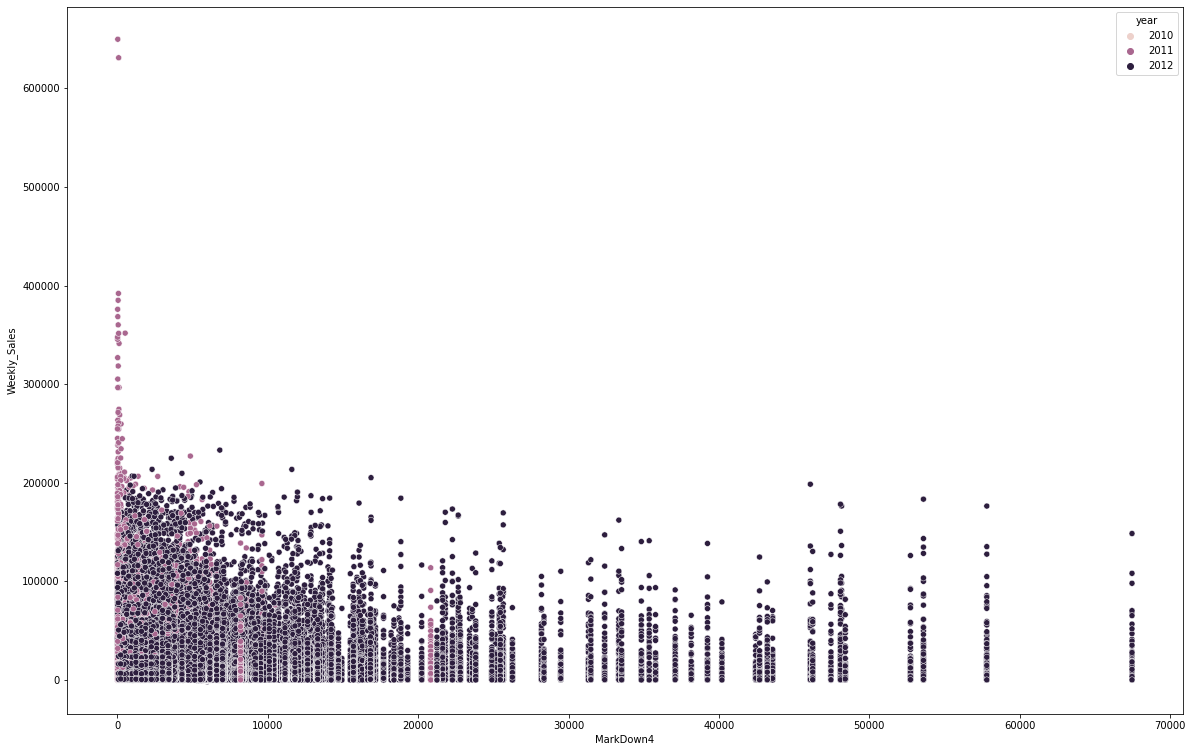

In [ ]:
sns.scatterplot(x='MarkDown4',y='Weekly_Sales',data= df_train,hue = 'year')

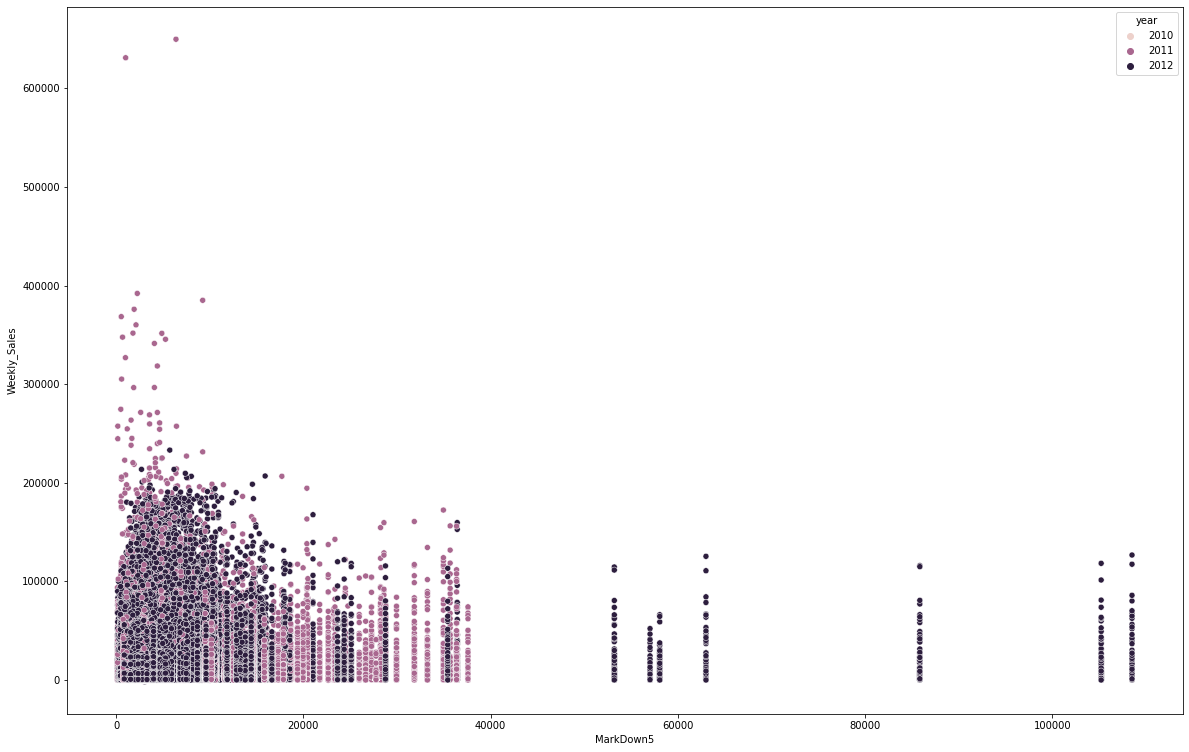

In [ ]:
sns.scatterplot(x='MarkDown5',y='Weekly_Sales',data= df_train,hue = 'year')

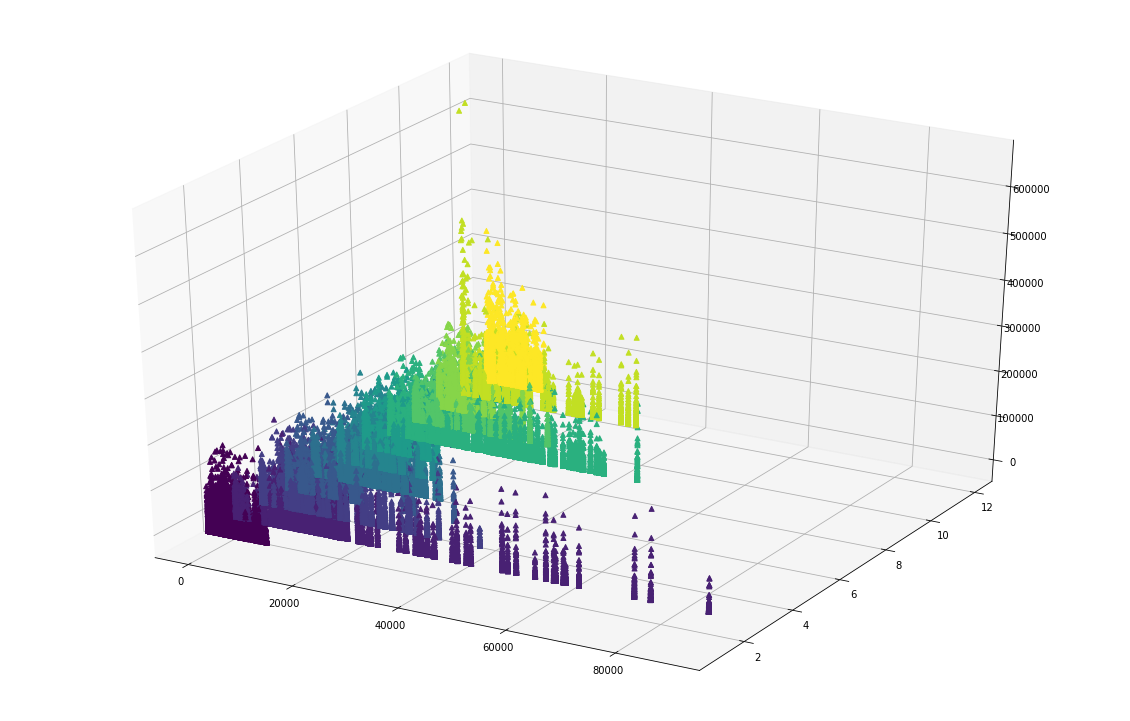

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['MarkDown1'],df_train['month'], df_train['Weekly_Sales'], s=25, c= df_train['month'], marker='^', alpha=1)
plt.show()

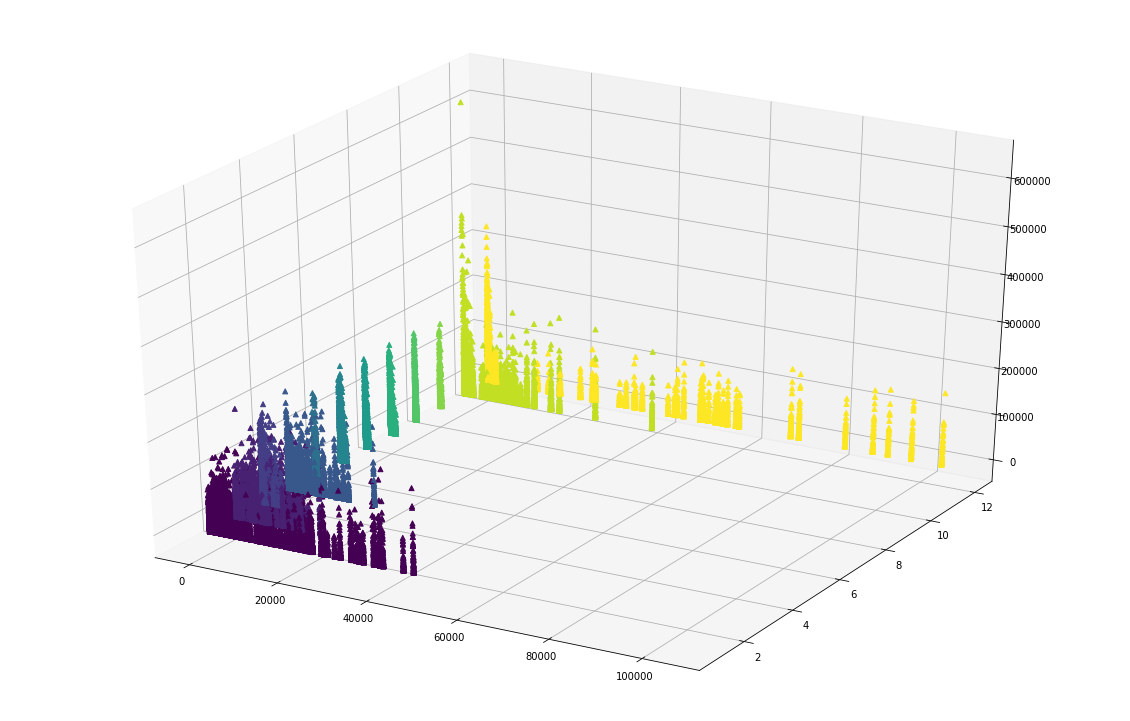

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['MarkDown2'],df_train['month'], df_train['Weekly_Sales'], s=25, c= df_train['month'], marker='^', alpha=1)
plt.show()

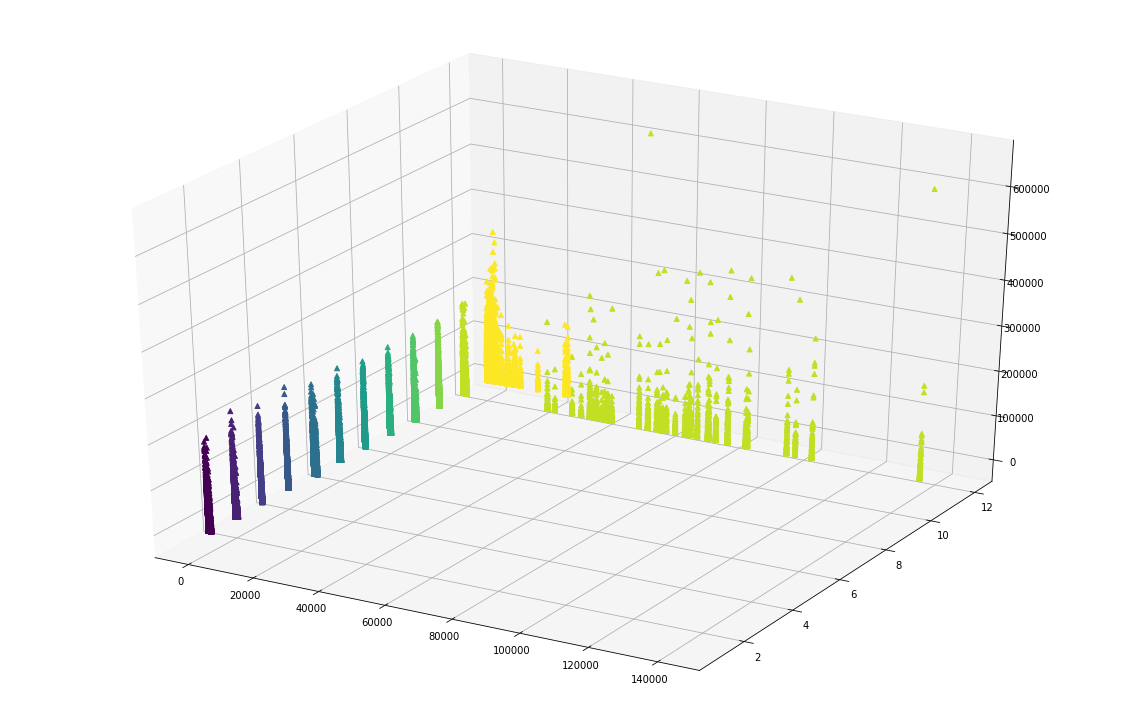

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['MarkDown3'],df_train['month'], df_train['Weekly_Sales'], s=25, c= df_train['month'], marker='^', alpha=1)
plt.show()#Looking at CPI

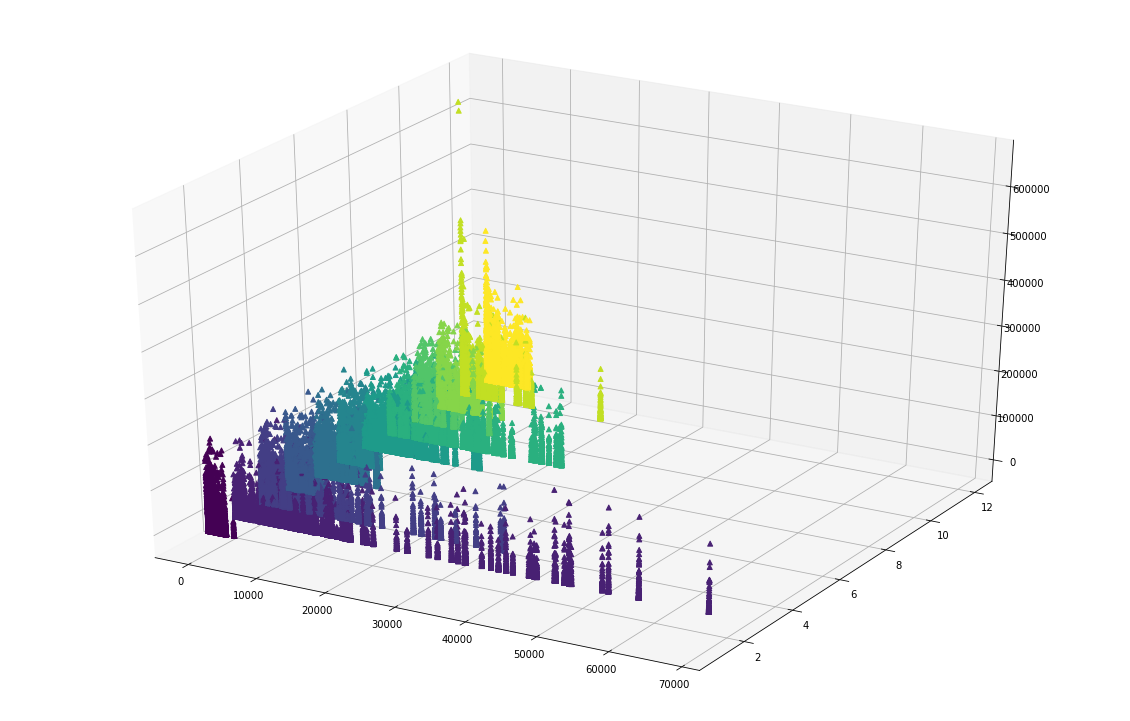

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['MarkDown4'],df_train['month'], df_train['Weekly_Sales'], s=25, c= df_train['month'], marker='^', alpha=1)
plt.show()

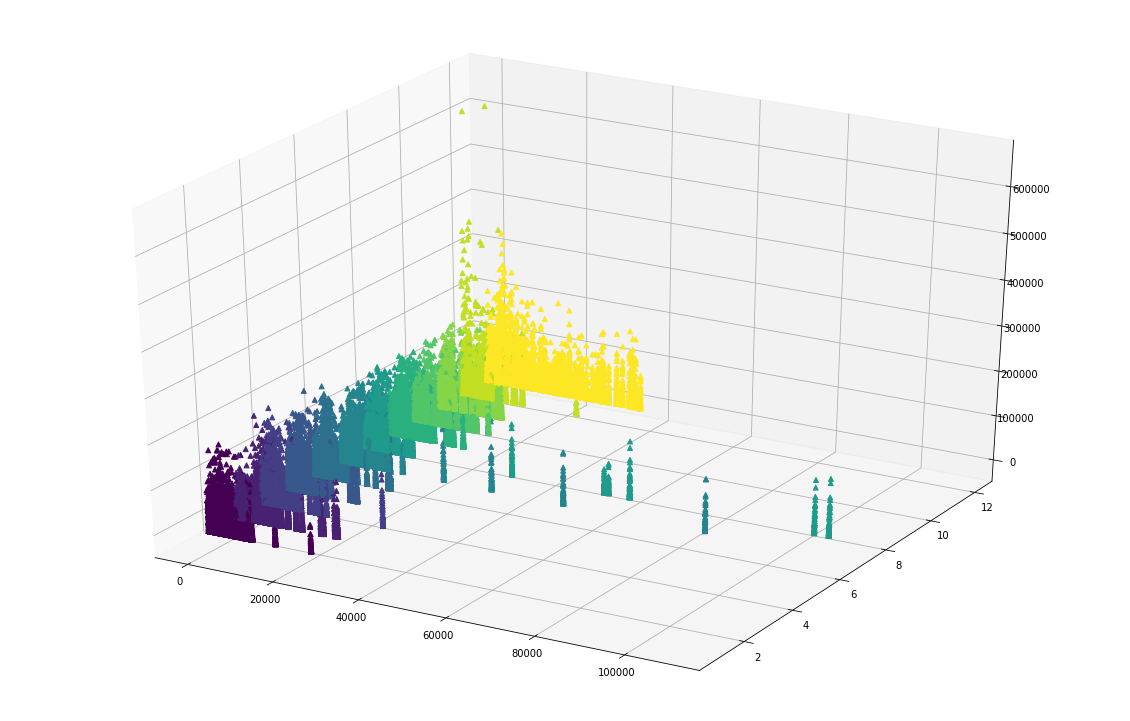

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['MarkDown5'],df_train['month'], df_train['Weekly_Sales'], s=25, c= df_train['month'], marker='^', alpha=1)
plt.show()

From all the markdown graphs ,it is easily visible markdown doesn't effect the sales 

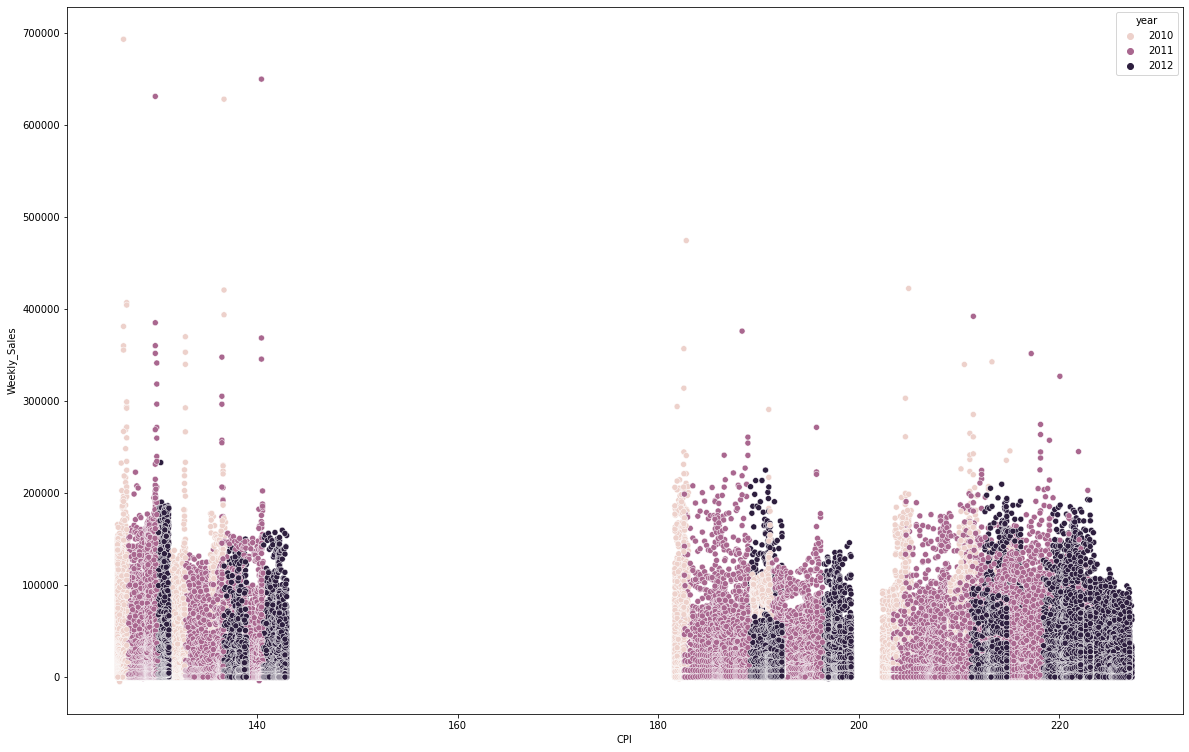

In [ ]:
sns.scatterplot(x='CPI',y='Weekly_Sales',data= df_train,hue = 'year')

I don't see any correlation here,

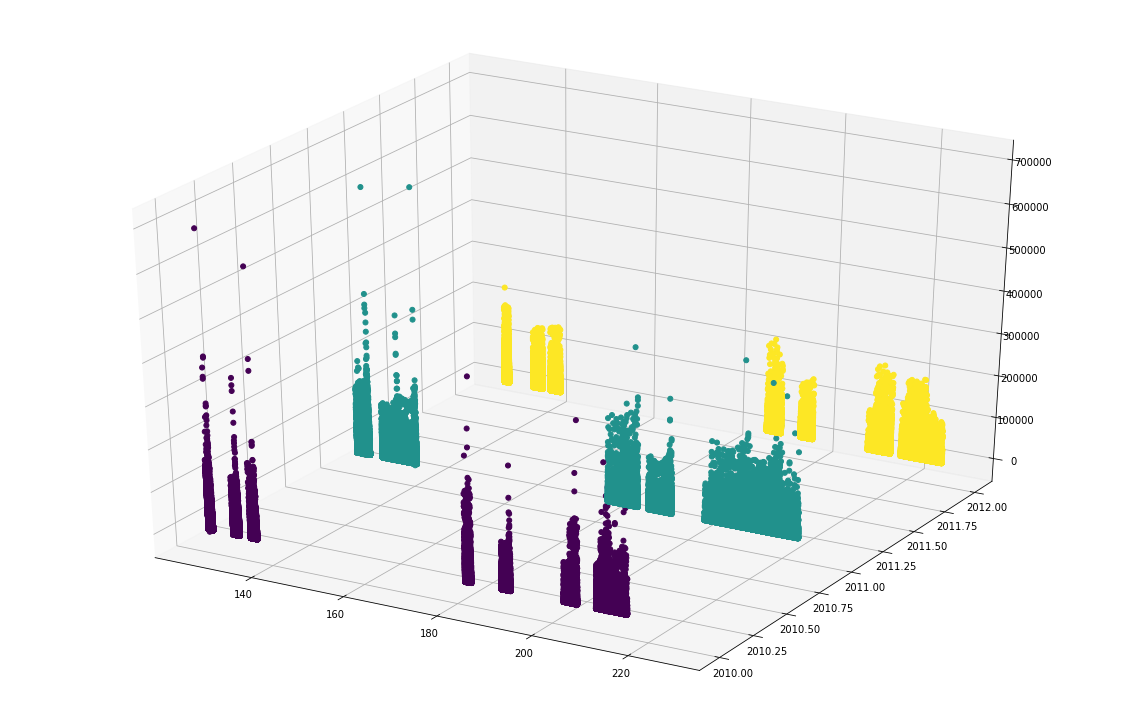

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter( df_train['CPI'],df_train['year'], df_train['Weekly_Sales'], s=25, c= df_train['year'], marker='o', alpha=1)
plt.show()

From above these graphs i couldn't find any relation with the target variable

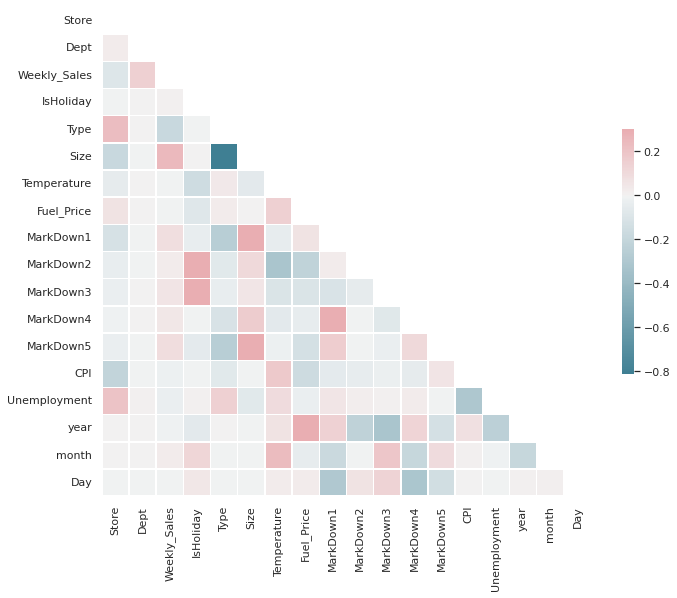

In [ ]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


* Size,type,store,holiday seems to me are important from my above analysis


The plan ahead i feel is to fill the missing values,
remove all the variable which are uncorrelated and try various models on it.

#STATIONARITY
looking at our graph since there is no trend,
with eyes it seems that our data is stationary.
 Using the  Dickey-Fuller Test here

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(df_train['Weekly_Sales'])

Results of Dickey-Fuller Test:
Test Statistic                    -31.988782
p-value                             0.000000
#Lags Used                         97.000000
Number of Observations Used    421472.000000
Critical Value (1%)                -3.430366
Critical Value (5%)                -2.861547
Critical Value (10%)               -2.566774
dtype: float64


The value of P< 0.05 hence the time series is stationary. 

Metric:
* The metric that we can i think use here would be the mean square error.The decision is obvious we want to punish the predicted variable wandering too far from the target varlible

* Besides this we have a metric which is provided by the wallmart itself which is the weights holidays are comparitively much heavier,the metric is  called weighted mean absolute error.
* So for the further modeling process instead of mean sqaure error we will use the provide metric(WMAE)


## Models


Since most of our data which is relavent for finding the weekly sales,is categorical data and models like Decision Tree's and it subsequent alteration perform better on them.We can see that in the results below


In [ ]:
#MODEL RANDOM FOREST AND XG BOOST

In [ ]:
#Running All the models my way.

In [ ]:
#RandomForest, ExtraTrees, XGB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
#print(train.info())
test = pd.read_csv('test.csv')
#print(test.info())
features = pd.read_csv('features.csv')
#print(features.info())
stores = pd.read_csv('/content/stores.csv')
#simply using merge function to merge the datasets.
df_train = train.merge(stores,how = 'left').merge(features,how = 'left')
df_test = test.merge(stores,how = 'left').merge(features,how = 'left')

Removing all the unnecessary features

In [ ]:
df_train

Store  Dept        Date  ...  MarkDown5         CPI Unemployment
0           1     1  2010-02-05  ...        NaN  211.096358        8.106
1           1     1  2010-02-12  ...        NaN  211.242170        8.106
2           1     1  2010-02-19  ...        NaN  211.289143        8.106
3           1     1  2010-02-26  ...        NaN  211.319643        8.106
4           1     1  2010-03-05  ...        NaN  211.350143        8.106
...       ...   ...         ...  ...        ...         ...          ...
421565     45    98  2012-09-28  ...    3288.25  192.013558        8.684
421566     45    98  2012-10-05  ...    2340.01  192.170412        8.667
421567     45    98  2012-10-12  ...    3990.54  192.327265        8.667
421568     45    98  2012-10-19  ...    1537.49  192.330854        8.667
421569     45    98  2012-10-26  ...     858.33  192.308899        8.667

[421570 rows x 16 columns]

In [ ]:
#from correlation matrix i observed that markdown1 to markdown 5 not important so is CPI,UNEMPLOYMENT,FUELPRICE,TEMPERATURE

In [ ]:
df_train = df_train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price',"Temperature","CPI","Unemployment"],axis = 1)

In [ ]:
df_test = df_test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Fuel_Price',"Temperature","CPI","Unemployment"],axis = 1)

In [ ]:
df_train.Type = df_train['Type'].map({'A':1,'B':2,'C':3})
df_test.Type = df_test['Type'].map({'A':1,'B':2,'C':3})

In [ ]:
df_train.IsHoliday = df_train['IsHoliday'].map({False:0,True:1})

In [ ]:
df_test.IsHoliday = df_test['IsHoliday'].map({False:0,True:1})

In [ ]:
df_train

Store  Dept        Date  Weekly_Sales  IsHoliday  Type    Size
0           1     1  2010-02-05      24924.50          0     1  151315
1           1     1  2010-02-12      46039.49          1     1  151315
2           1     1  2010-02-19      41595.55          0     1  151315
3           1     1  2010-02-26      19403.54          0     1  151315
4           1     1  2010-03-05      21827.90          0     1  151315
...       ...   ...         ...           ...        ...   ...     ...
421565     45    98  2012-09-28        508.37          0     2  118221
421566     45    98  2012-10-05        628.10          0     2  118221
421567     45    98  2012-10-12       1061.02          0     2  118221
421568     45    98  2012-10-19        760.01          0     2  118221
421569     45    98  2012-10-26       1076.80          0     2  118221

[421570 rows x 7 columns]

In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month
df_train['week'] = df_train['Date'].dt.week

In [ ]:
df_train

Store  Dept       Date  Weekly_Sales  ...    Size  year  month  week
0           1     1 2010-02-05      24924.50  ...  151315  2010      2     5
1           1     1 2010-02-12      46039.49  ...  151315  2010      2     6
2           1     1 2010-02-19      41595.55  ...  151315  2010      2     7
3           1     1 2010-02-26      19403.54  ...  151315  2010      2     8
4           1     1 2010-03-05      21827.90  ...  151315  2010      3     9
...       ...   ...        ...           ...  ...     ...   ...    ...   ...
421565     45    98 2012-09-28        508.37  ...  118221  2012      9    39
421566     45    98 2012-10-05        628.10  ...  118221  2012     10    40
421567     45    98 2012-10-12       1061.02  ...  118221  2012     10    41
421568     45    98 2012-10-19        760.01  ...  118221  2012     10    42
421569     45    98 2012-10-26       1076.80  ...  118221  2012     10    43

[421570 rows x 10 columns]

In [ ]:
dfy_train =  df_train["Weekly_Sales"]

In [ ]:
df_train =df_train.drop(['Date',"Weekly_Sales"],axis = 1)

Defining our metric WMAE as provided by the Wallmart Sales Stores

In [ ]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

Creating Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, dfy_train, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#standardising the values

scaler=StandardScaler()
scaler.fit(X_train['Size'].values.reshape(-1,1))
X_train['Size'] = scaler.transform(X_train['Size'].values.reshape(-1, 1))
X_test['Size'] = scaler.transform(X_test['Size'].values.reshape(-1, 1))

In [ ]:
#Simple KNN 

In [ ]:
# Moving Average

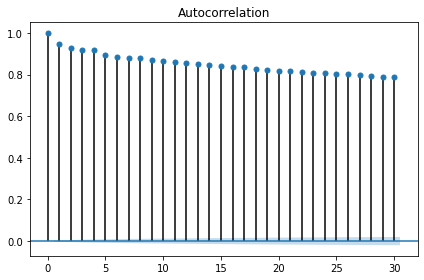

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dfy_train, lags=30);
plt.tight_layout()

In [ ]:
len(dfy_train)

421570

In [ ]:
from statsmodels.tsa.arima_model import ARMA
ma_train = dfy_train[:-21570]
ma_test = dfy_train[-21570:]
model = ARMA(ma_train, order=(0, 10))
results = model.fit()
predictions = results.forecast(steps=21570)
predictions_df = pd.DataFrame(index=ma_test.index, data=predictions[0])


In [ ]:
predictions_df[0]

400000     5378.538231
400001     6999.635620
400002     8958.219790
400003     9464.047693
400004    11079.679064
              ...     
421565    16257.416792
421566    16257.416792
421567    16257.416792
421568    16257.416792
421569    16257.416792
Name: 0, Length: 21570, dtype: float64

In [ ]:
ma_test

400000    3230.12
400001    4209.41
400002    2733.67
400003    5347.33
400004    2716.68
           ...   
421565     508.37
421566     628.10
421567    1061.02
421568     760.01
421569    1076.80
Name: Weekly_Sales, Length: 21570, dtype: float64

In [ ]:
WMAE(df_train[-21570:],ma_test,predictions_df[0])

14056.91

In [ ]:
df_train[-21570:]

Store  Dept  IsHoliday  Type    Size  year  month  week
400000     43    16          0     3   41062  2011      6    24
400001     43    16          0     3   41062  2011      6    25
400002     43    16          0     3   41062  2011      7    26
400003     43    16          0     3   41062  2011      7    27
400004     43    16          0     3   41062  2011      7    28
...       ...   ...        ...   ...     ...   ...    ...   ...
421565     45    98          0     2  118221  2012      9    39
421566     45    98          0     2  118221  2012     10    40
421567     45    98          0     2  118221  2012     10    41
421568     45    98          0     2  118221  2012     10    42
421569     45    98          0     2  118221  2012     10    43

[21570 rows x 8 columns]

In [ ]:
#looking at the values our model is performing worse

In [ ]:
#Auto Regression

In [ ]:
 ar_train = ma_train
 ar_test = ma_test

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
#train the autoregression model
model = AR(ar_train)
model_fitted = model.fit(lag = 20)

In [ ]:
predictions = model_fitted.predict(start = len(ar_train),end = len(ar_train)+len(ar_test)-1,dynamic = False)


In [ ]:
predictions

400000     3801.015580
400001     3914.398809
400002     3798.558537
400003     4349.575035
400004     3610.820652
              ...     
421565    16248.607147
421566    16248.607147
421567    16248.607147
421568    16248.607147
421569    16248.607147
Length: 21570, dtype: float64

In [ ]:
ar_test

400000    3230.12
400001    4209.41
400002    2733.67
400003    5347.33
400004    2716.68
           ...   
421565     508.37
421566     628.10
421567    1061.02
421568     760.01
421569    1076.80
Name: Weekly_Sales, Length: 21570, dtype: float64

In [ ]:
WMAE(df_train[-21570:],ar_test,predictions)

13954.13

In [ ]:
#Both these models perform really bad,moving forward moving further 


## Runnning a simple KNN models with various values of K

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20):
   neigh = KNeighborsRegressor(n_neighbors=i)
   neigh.fit(X_train, y_train)
   y_pred_tes = neigh.predict(X_test)
   print(WMAE(X_test,y_test,y_pred_tes))

6972.08
6217.19
6084.11
6196.91
6439.2
6732.78
6981.16
7168.74
7321.42
7456.56
7560.44
7650.14
7730.75
7796.57
7866.87
7924.5
7985.41
8042.83
8092.66


## Ridge Regression

In [ ]:
## Ridge Regression
#since most of our models are categorical this is sure to perform inaccurately
from sklearn.linear_model import Ridge
r_r = Ridge()
r_r.fit(X_train,y_train)
y_pred = r_r.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

14876.6


## Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr  = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predtr =lr.predict(X_train)
y_pred = lr.predict(X_test)
print(WMAE(X_train,y_train,y_predtr))
print(WMAE(X_test,y_test,y_pred))
#performs worse the knn where k =19

14776.69
14876.61


## Decision Tree

In [ ]:
#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(WMAE(X_test,y_test,y_pred))
#since they are not effected by the standard scaling and work categorically we can see our model performs better on these models

1936.8


## Random Forest Untuned

In [ ]:
#Random Forest untuned

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42).fit(X_train,y_train)
y_pred = model.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

1583.47


- tuning  random forest
- since here we cannot use grid search or any other thing,
- i have to write a function and check


In [ ]:
def random_forest_1(n_estimators,max_depth):
  results = []
  for i in n_estimators:
    for j in max_depth:
      RF = RandomForestRegressor(n_estimators= i , max_depth=j)
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      k = (WMAE(X_test,y_test,y_pred))
      print(i , j , k )

In [ ]:
def random_forest_2(n_estimators,max_depth,max_features):
  results = []
  for i in max_features:
      RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,max_features = i)
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      k = (WMAE(X_test,y_test,y_pred))
      print(n_estimators,max_depth,i,k)

In [ ]:
def random_forest_3(n_estimators,max_depth,max_features,min_samples_split, min_samples_leaf):
  results = []
  for i in min_samples_split:
    for j in min_samples_leaf:
      RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,max_features = max_features,min_samples_split = i,min_samples_leaf = j)      
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      k = (WMAE(X_test,y_test,y_pred))
   b   print(n_estimators,max_depth,max_features,i,j, k)

In [ ]:
#logic inspired from various kaggle notebooks
n_estimators = [56,57,58]
max_depth = [25,26,27,27]
random_forest_1(n_estimators,max_depth)

In [ ]:
#so from above 58 27 are performing good so i will take it.

In [ ]:
max_features = [2, 3, 4, 5, 6, 7,"auto"]
random_forest_2(56,27,max_features)

56 27 2 5924.5
56 27 3 3504.24
56 27 4 2164.31
56 27 5 1664.43
56 27 6 1582.48
56 27 7 1568.93
56 27 auto 1594.06


In [ ]:
#56 27 7

In [ ]:
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
random_forest_3(56,27,7,min_samples_split,min_samples_leaf)

56 27 7 2 1 1571.36
56 27 7 2 2 1617.83
56 27 7 2 3 1664.49
56 27 7 3 1 1569.05
56 27 7 3 2 1624.16
56 27 7 3 3 1665.89
56 27 7 4 1 1587.81
56 27 7 4 2 1628.95
56 27 7 4 3 1659.09


After running various models I am very clear that n_estimators 56
max_depth = 27,max_features = 7 and min_samples_split = 2,min_samples_leaf = 1 provide good results

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=56, max_depth=27,max_features = 7,min_samples_split = 2,min_samples_leaf = 1).fit(X_train,y_train)
y_pred = model.predict(X_test)
print(WMAE(X_test,y_test,y_pred))

1571.75


In [ ]:
__________________________________________________________________________________________________

In [ ]:
___________________________________________________________________________________________________

## XGBOOST

In [ ]:
#performing XGBOOST REGRESSOR

In [ ]:
from xgboost import XGBRegressor

In [ ]:
n_estimators = [100, 200, 300, 400, 500]
max_depth = [5, 10, 15, 20]

In [ ]:
def XGB_1(n_estimators,max_depth):
  results = []
  for i in n_estimators:
    for j in max_depth:
      RF = XGBRegressor(n_estimators= i , max_depth=j)
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      k = (WMAE(X_test,y_test,y_pred))
      print(i , j , k )

In [ ]:
XGB_1(n_estimators,max_depth)

[16:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100 5 4881.77
[17:00:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100 10 2094.65
[17:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100 15 1358.99
[17:02:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100 20 1363.47
[17:04:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200 5 4094.82
[17:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200 10 1740.36
[17:07:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
200 15 1303.23
[17:09:5

In [ ]:
#SO 60,25 SEEMS TO BE WORKING REALLY WELL

In [ ]:
learning_rate = [0.1 , 0.2, 0.4, 0.6, 0.8, 0.9]
def XGB_2(n_estimators,max_depth,learning_rate):
  results = []
  for i in learning_rate:
      RF = XGBRegressor(n_estimators= n_estimators , max_depth=max_depth ,learning_rate = i)
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      k = (WMAE(X_test,y_test,y_pred))
      print(n_estimators,max_depth,i,k )

In [ ]:
XGB_2(300,15,learning_rate)

In [ ]:
#preperation for submission  on Kaggle 

Since we have found out all the necessary values required and the models which gives better results.
Checking the predicition and Kaggle Score

In [ ]:
#removing values from df_test
df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')
df_test['year'] = df_test['Date'].dt.year
df_test['month'] = df_test['Date'].dt.month
df_test['week'] = df_test['Date'].dt.week

In [ ]:
df_test = df_test.drop(['Date'],axis = 1)

In [ ]:
XGB = XGBRegressor(n_estimators= 300 , max_depth=15,learning_rate= 0.1).fit(df_train,dfy_train)
model = RandomForestRegressor(n_estimators=56, max_depth=27,max_features = 7,min_samples_split = 3,min_samples_leaf = 1,random_state = 42).fit(df_train,dfy_train)
#model is for random forest
#XGB is for XGBoos5t

In [ ]:
final  = model.predict(df_test)
final2 = XGB.predict(df_test)

In [ ]:
dsx = pd.read_csv("/content/sampleSubmission.csv")
dsx["Weekly_Sales"] = final
dsx.to_csv('file4.csv')
dsrf = pd.read_csv("/content/sampleSubmission.csv")
dsrf["Weekly_Sales"] = final2
dsrf.to_csv('file5.csv')

In [ ]:
#kudos
Kaggle_Score : 
XGBoost = 2898
Random_Forest  = 2852


NameError: name 'pd' is not defined